# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
import warnings
warnings.simplefilter(action='ignore')

# 2. Descrição dos dados

* Name (nome)
* Platform (plataforma)
* Year_of_Release (Ano de lançamento)
* Genre(gênero)
* NA_sales (vendas norte-americanas em milhões de USD)
* EU_sales (vendas na Europa em milhões de USD)
* JP_sales (vendas no Japão em milhões de USD)
* Other_sales (vendas em outros países em em milhões de USD)
* Critic_Score - (Pontuação crítica) (máximo de 100)
* User_Score - (Pontuação do usuário) (máximo de 10)
* Classificação (ESRB)




# 3. Exploração inicial

In [2]:
try:
    df = pd.read_csv(r'games.csv')
except:
    df = pd.read_csv(r'/datasets/games.csv')

In [3]:

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.query('NA_sales == 0.000000 and EU_sales == 0.000000 and JP_sales == 0.000000 and Other_sales == 0.000000')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
df.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [10]:
#

df.Rating.unique()


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
df2 = df

df2.fillna()
df2

## Conclusão do Tópico

Inicialmente, observa-se que há muitos dados faltantes, dados esses que possuem informações importantes, como por exemplo os dados da coluna Critic Score e User Score. 
A coluna Rating, por exemplo, entende-se que os valores usentes presentes nela correspondem a games que não foram categorizados ainda.
Ano de lançamento, os valores ausentes correspondem 1,6% dos valor total do Dataset. Como a informação é importante, os valores tentaram serem recuperados baseados nos nomes dos jogos e plataformas que possuem o ano de lançamento

# 2. Tratando Dados

> Os valores ausentes serão tratados cada um de forma particular, por exemplo: 

>> * Os valores ausentes na coluna 'name' serão excluídos;
>> * os valores ausentes na coluna 'year_of_release' serão preenchidos de acordo com sua correpondência em outras plataformas;
>> * os valores ausentes na coluna 'genre' serão excluídos juntamente com os valores da coluna 'name'
>> * os valores ausentes na coluna 'critic_score' não serão preenchidos, porém serão dropados na hora da análise correspondente;
>> * os valores ausentes na coluna 'rating' serão substituídos por RP ("Rating Pending"), entendendo que esses a esses jogos não foram atribuído uma categorização etária.
>> * aos valores ausentes na coluna 'user_score'  foi atribuido o valor 'tbd', esse valor será convertido em 'Nan' e com isso, excluído das análises, já que se entende que não houve atribuição de nota ainda para esse jogo.
>> * Será criada uma coluna com a soma total das vendas dos jogos, para que possa ter uma noção de quanto esses jogos venderam globalmente.



In [12]:
df.query("User_Score == 'tbd'")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
# Alterando Rating
df['User_Score'].replace('tbd', np.nan, inplace=True)
df['Rating'].replace('K-A', 'E', inplace=True)
df['Rating'].fillna('RP', inplace=True)
df['User_Score'] = pd.to_numeric(df['User_Score'])



In [14]:

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [15]:
# Criação da coluna que comporta a soma das vendas de todas as regiões.

df['total_sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


In [16]:
df.groupby('platform')['total_sale'].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sale, dtype: float64

In [17]:
anos_null = (df[df['year_of_release'].isna()].shape[0] / df.shape[0]) * 100

print(f"A quantidade de anos faltantes no data set é de {round(anos_null,2)}%")

A quantidade de anos faltantes no data set é de 1.61%


In [18]:
df['year_of_release'] = df.groupby('name')['year_of_release'].apply(lambda x:x.fillna(x.mean()))

In [19]:
anos_null = (df[df['year_of_release'].isna()].shape[0] / df.shape[0]) * 100

print(f"Após o tratamento de preenchimento dos valores faltantes na coluna 'year_of_release' a nova quantidade de anos faltantes no data set é de {round(anos_null,2)}%")

Após o tratamento de preenchimento dos valores faltantes na coluna 'year_of_release' a nova quantidade de anos faltantes no data set é de 0.89%


### OBS.: Ainda há jogos que com dados ausentes na coluna 'year_of_release', porém esses dados não estão presentes em nenhum outro lugar do Dataset. Como se pode ver abaixo com o exemplo do jogo: Rock Band.

In [20]:
df[df['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12


In [21]:
# Criação de um Dataset sem os valores ausentes das coluna: 'name', 'year_of_release' e 'genre'

df_dropped = df.dropna(subset=['year_of_release', 'name', 'genre'])
df_dropped['year_of_release'] =  df_dropped['year_of_release'].astype(int)
df_dropped.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [22]:
df_dropped.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
total_sale            0
dtype: int64

In [23]:
# Não existem duplicatas.

df.duplicated().sum()

0

## Conclusão intermediária

Os dados possuem valores ausentes na coluna referente ao ano de lançamento dos jogos,  tais valores não correspondem a uma fatia expressiva dos dados, pois contam apenas 269 jogos, mas alguns possuem valores expressivos em relação às vendas, logo será criado diferentes dataframes que não excluam esses jogos em quando a análise for referente às vendas. Não houve duplicatas nos dados de nenhum tipo.

Houveram valores como TBD e Valores "Nan" nas colunas referentes a notas dos jogos, os valores TBD foram converstidos para "Nan" para não intereferirem na análise dos dados e serem retirados na hora dos cálculos da média, mediana e etc. A Coluna é uma coluna de valores númericos, logo não poderia ter valores do tipo textual, como o numero 0 seria uma nota atribuída e inteferiria nos valores da média e mediana opta-se para transformá-lo em "Nan".

># Alteração das Classificações

Foi necessária a troca da classificação "K-A" devido ao fato desta ter sido alterada pelo ESRB e entrado na categoria "E" ("Everyone"). 

A respeito da Classificação "RP" ("Rating Pending"), esta foi mantida, por conter o mesmo carater dos valores "Nan" e dos TBD. Sendo este último substituido por "Nan", pois a coluna é numérica, enquanto aquele, o "RP" será mantido, já que a sua coluna é de texto do tipo object.


* EC" ("Early childhood") - "Para crianças": Basicamente para qualquer idade, pois são jogos permitidos para criaçnas de 0-3+ anos .

* “E” (“Everyone”) - “Todos”: Jogos permitidos para crianças acima de 6 anos, antigo "K-A" ("Kids to Adults").

* “E10 +” (“Everyone 10 and older”) - “Para todos acima de 10 anos.”

* "T" ("Teen") - "Jovens": Recomendados para jovens acima de 13 anos. Por conter certo grau de violência, humor mais adulto, alguem conteúdo de cunho sexualizado.

* "M" ("Mature") - "Para Adultos": Jogos adequado para jovens com mais de 17 anos, por conter cenas de violência mais explícita, cenas de conteúdo sexual, que não é recomendado para a audiência mais jovem.

* "AO" ("Adults Only 18 +") - "Somente Adultos": Adequado apenas para pessoas com mais de 18 anos, por conter cenas prolongadas de violência, ou uma nível alto de conteúdo sexual explícito, cenas de nudes e etc. 

* "RP" ("Rating Pending") - "Pendente de Classificação": Jogos que ainda estão em Demo, ou ainda não classificado pela ESRB.



# 3. Analisando dados

> ## 3.1. Análise Inicial e construção de gráficos

In [24]:
# Tempo médio de vida útil das plataformas

anos = df_dropped.groupby(['platform', 'year_of_release'])['name'].count()
anos = anos.reset_index()
plat_life_time = anos.groupby('platform')['year_of_release'].agg(['sum', 'mean', 'count'])

IQR_anos = (plat_life_time['count'].quantile(.75))-(plat_life_time['count'].quantile(0.25))
IQR_anos_max = (plat_life_time['count'].quantile(.75) + 1.5*IQR_anos)
IQR_anos_min = (plat_life_time['count'].quantile(.25) - 1.5*IQR_anos)

print(f''' O tempo de de vida útil de uma plataforma possui um limite inferior de {round(IQR_anos_min, 2)} ano.
 O tempo de vida útil de uma plataforma possui o limite superior de {round(IQR_anos_max, 2)} ano


'''     
      )
       


mean_life = plat_life_time.query('@IQR_anos_min < count < @IQR_anos_max')['count'].mean()
print(f'Em média uma plataforma tem: {round(mean_life)} anos de vida útil.')

 O tempo de de vida útil de uma plataforma possui um limite inferior de -6.5 ano.
 O tempo de vida útil de uma plataforma possui o limite superior de 21.5 ano



Em média uma plataforma tem: 7 anos de vida útil.


Text(0, 0.5, 'Volume')

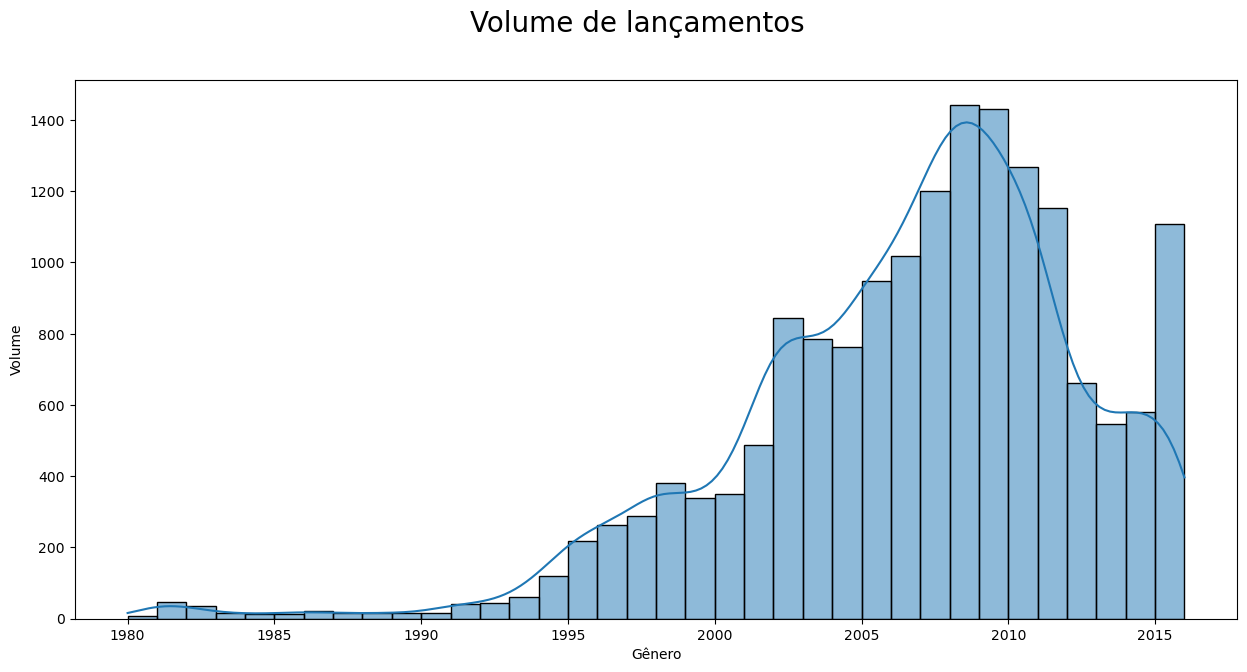

In [25]:
plt.figure(figsize=(15, 7))
plt.suptitle('Volume de lançamentos', fontsize= 20)


sns.histplot(data= df_dropped, x='year_of_release', kde=True, bins=36);
plt.xlabel("Gênero")
plt.ylabel("Volume")

### Pode se observar que ouve um crescimento expressivo de lançamentos de novos jogos de 1990 até o ano de 2008, onde houve seu pico, de 2009 até 2014 começou queda também expressiva desse volume de lançamentos, em 2015 há uma recuperação.

In [26]:
plat_year = df.groupby(['platform', 'year_of_release'])['total_sale'].agg(['mean','sum','median', 'std', 'count'])
plat_year.query('year_of_release >= 2010')

mean    sum  median       std  count
platform year_of_release                                          
3DS      2010.0           0.300000   0.30   0.300       NaN      1
         2011.0           0.544828  63.20   0.145  1.618264    116
         2012.0           0.550638  51.76   0.190  1.404245     94
         2013.0           0.621648  56.57   0.100  1.749257     91
         2014.0           0.547000  43.76   0.090  1.638058     80
...                            ...    ...     ...       ...    ...
X360     2016.0           0.116923   1.52   0.100  0.114483     13
XOne     2013.0           0.997895  18.96   0.800  0.847562     19
         2014.0           0.886393  54.07   0.440  1.208422     61
         2015.0           0.751750  60.14   0.245  1.234873     80
         2016.0           0.300575  26.15   0.060  0.549133     87

[67 rows x 5 columns]

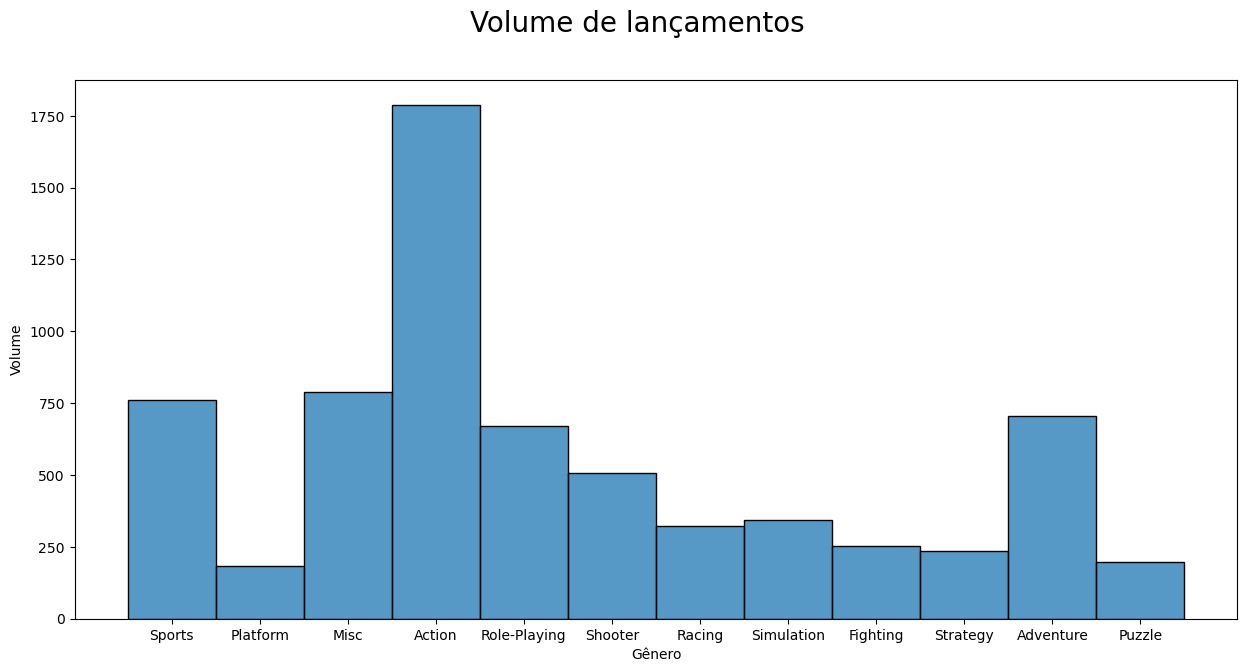

In [27]:
# Volume de lançamento por gênero nos últimos 7 anos.

plt.figure(figsize=(15, 7))
plt.suptitle('Volume de lançamentos', fontsize= 20)

sns.histplot(data= df_dropped.query('year_of_release >= 2009'), stat='count', multiple='dodge',  x='genre');
plt.xlabel("Gênero")
plt.ylabel("Volume")

plt.show();

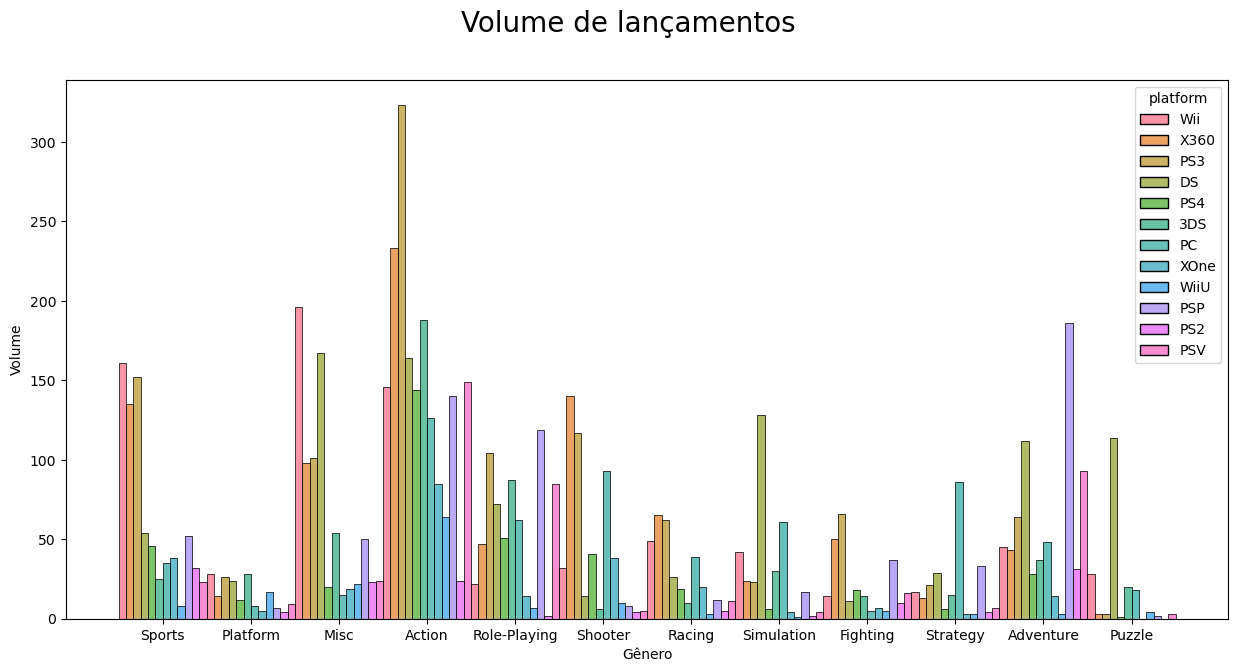

In [28]:
# Volume de lançamento por gênero filtrado por plataforma dos últimos 7 anos.

plt.figure(figsize=(15, 7))
plt.suptitle('Volume de lançamentos', fontsize= 20)

sns.histplot(data= df_dropped.query('year_of_release >= 2009'), stat='count', multiple='dodge',  x='genre', hue='platform');
plt.xlabel("Gênero")
plt.ylabel("Volume")

plt.show();

### É nítido que os games do gênero ação são mais populares e são a grande aposta das empresas. 

Text(0, 0.5, 'Volume')

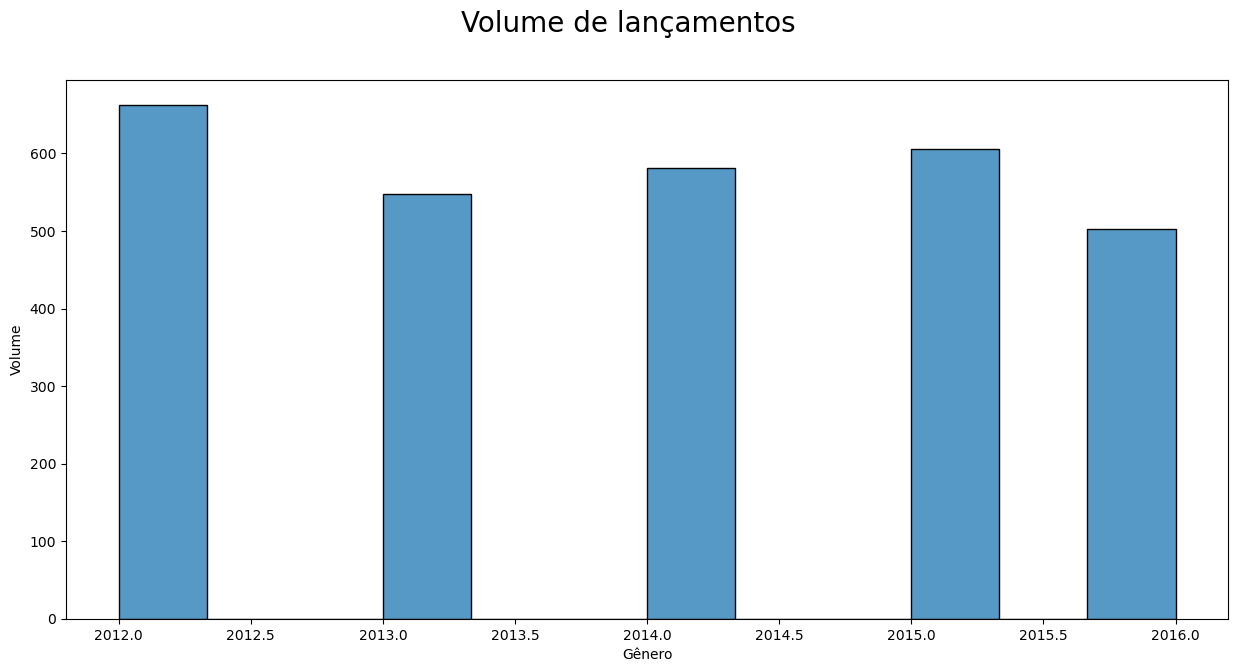

In [29]:
plt.figure(figsize=(15, 7))
plt.suptitle('Volume de lançamentos', fontsize= 20)

sns.histplot(data= df_dropped.query('year_of_release >= 2012'), stat='count', x='year_of_release', bins= 12, multiple='dodge');
plt.xlabel("Gênero")
plt.ylabel("Volume")

Text(0, 0.5, 'Volume')

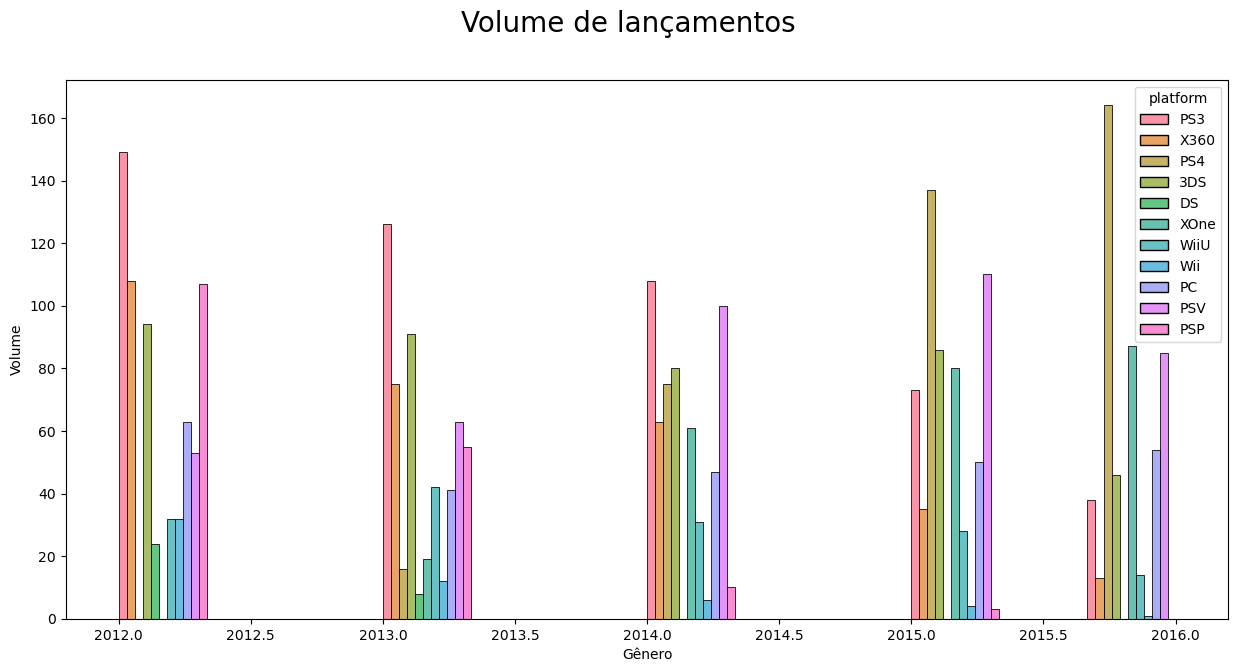

In [30]:
plt.figure(figsize=(15, 7))
plt.suptitle('Volume de lançamentos', fontsize= 20)

sns.histplot(data= df_dropped.query('year_of_release >= 2012'), stat='count', x='year_of_release', bins= 12, hue='platform', multiple='dodge');
plt.xlabel("Gênero")
plt.ylabel("Volume")

### O volume total de jogos lançados em 2012 é superior aos outros anos, sendo liderado pela plataforma PS3, já oberservando os dados mais mais filtros, 2016 o PS4 liderou de longe os lançamentos do ano. 

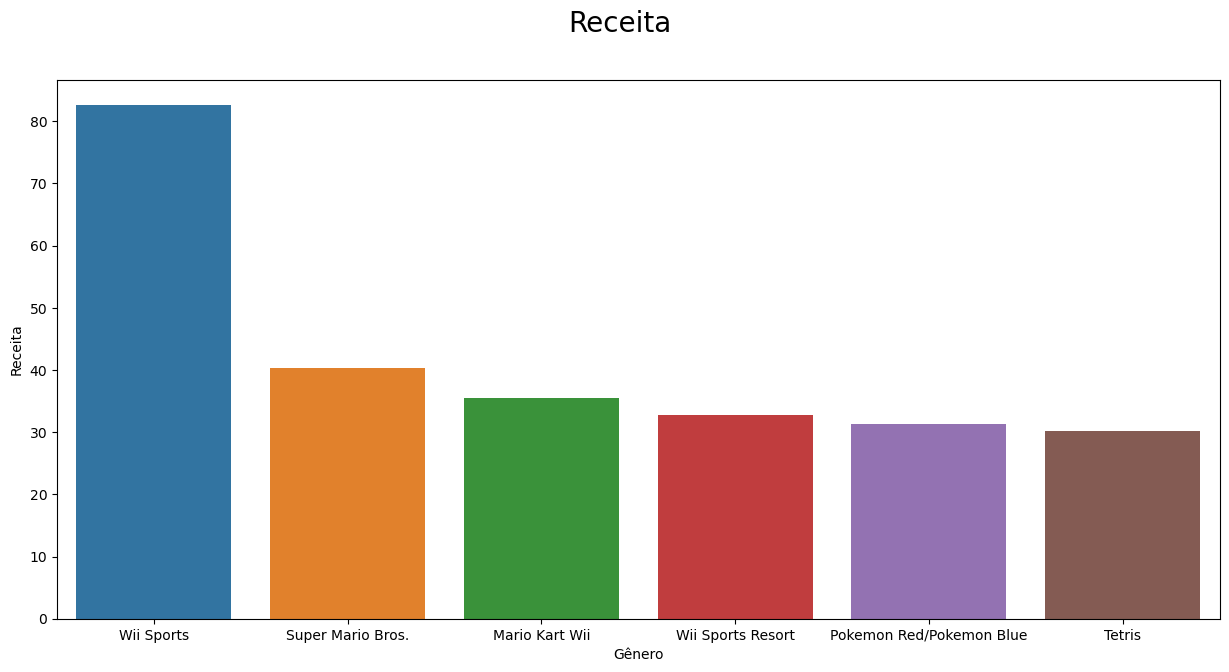

In [31]:
plt.figure(figsize=(15, 7))
plt.suptitle('Receita', fontsize= 20)

sns.barplot(data= df_dropped.sort_values('total_sale', ascending=False).head(6), x='name', y='total_sale');
plt.xlabel("Gênero")
plt.ylabel("Receita")

plt.show;

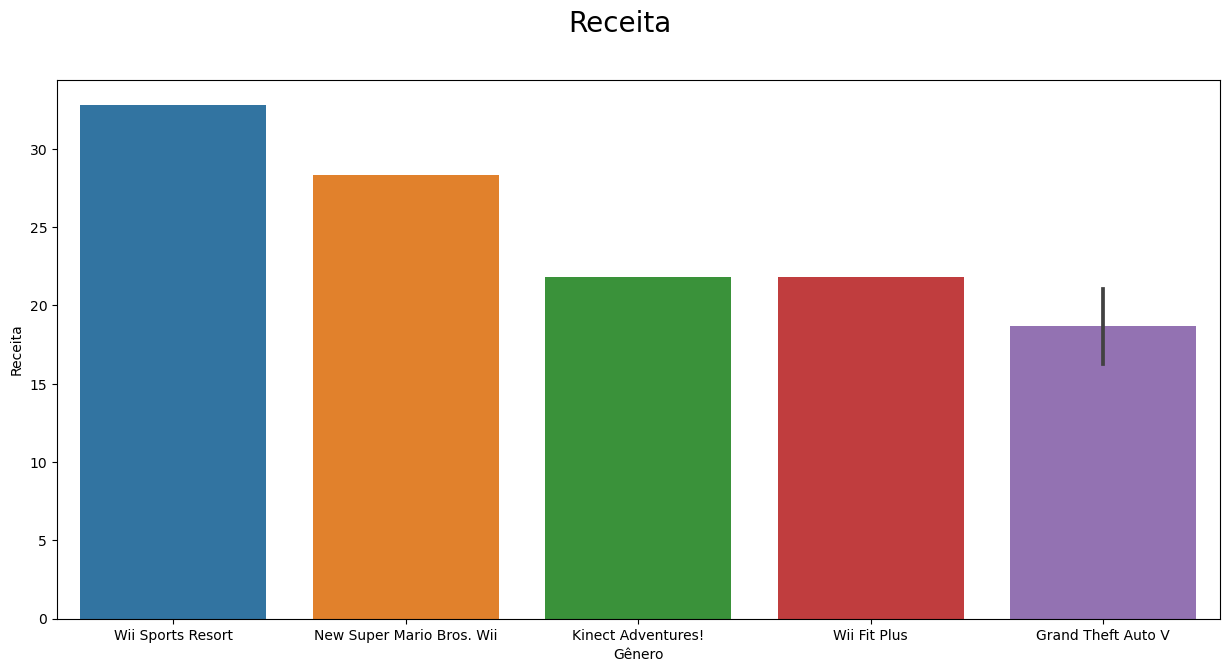

In [32]:
plt.figure(figsize=(15, 7))
plt.suptitle('Receita', fontsize= 20)

sns.barplot(data= df_dropped.query('year_of_release >= 2009').sort_values('total_sale', ascending=False).head(6), x='name', y='total_sale');
plt.xlabel("Gênero")
plt.ylabel("Receita")

plt.show;

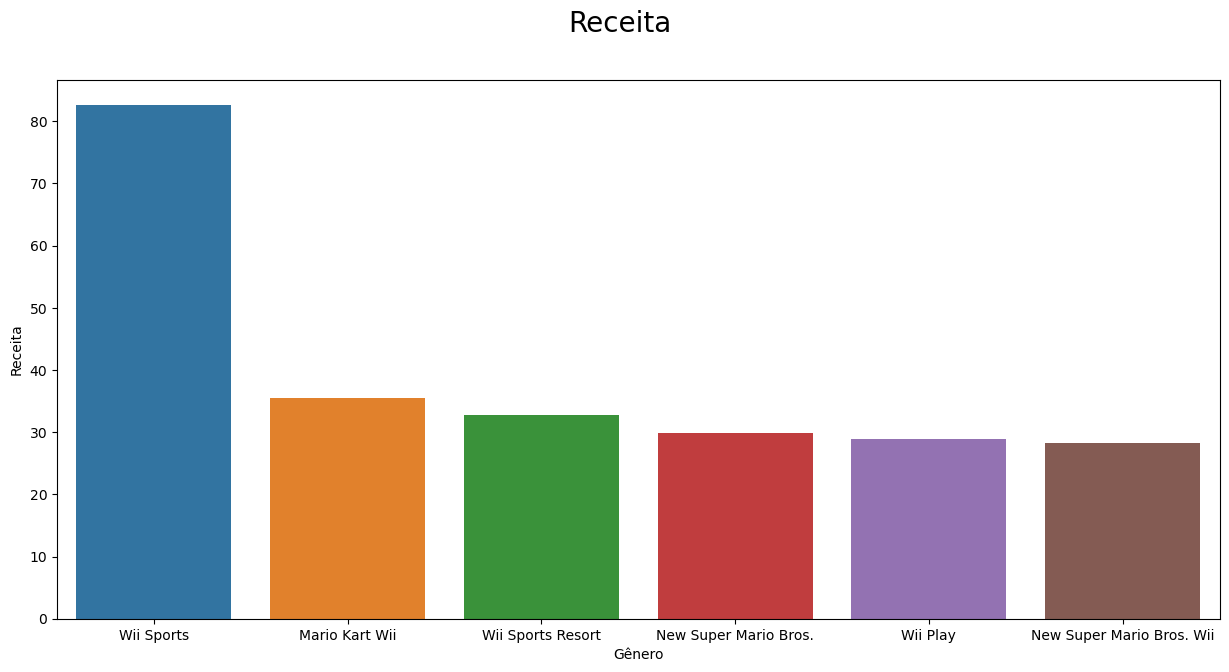

In [33]:
plt.figure(figsize=(15, 7))
plt.suptitle('Receita', fontsize= 20)

sns.barplot(data= df_dropped.query('year_of_release >= 2000').sort_values('total_sale', ascending=False).head(6), x='name', y='total_sale');
plt.xlabel("Gênero")
plt.ylabel("Receita")

plt.show;

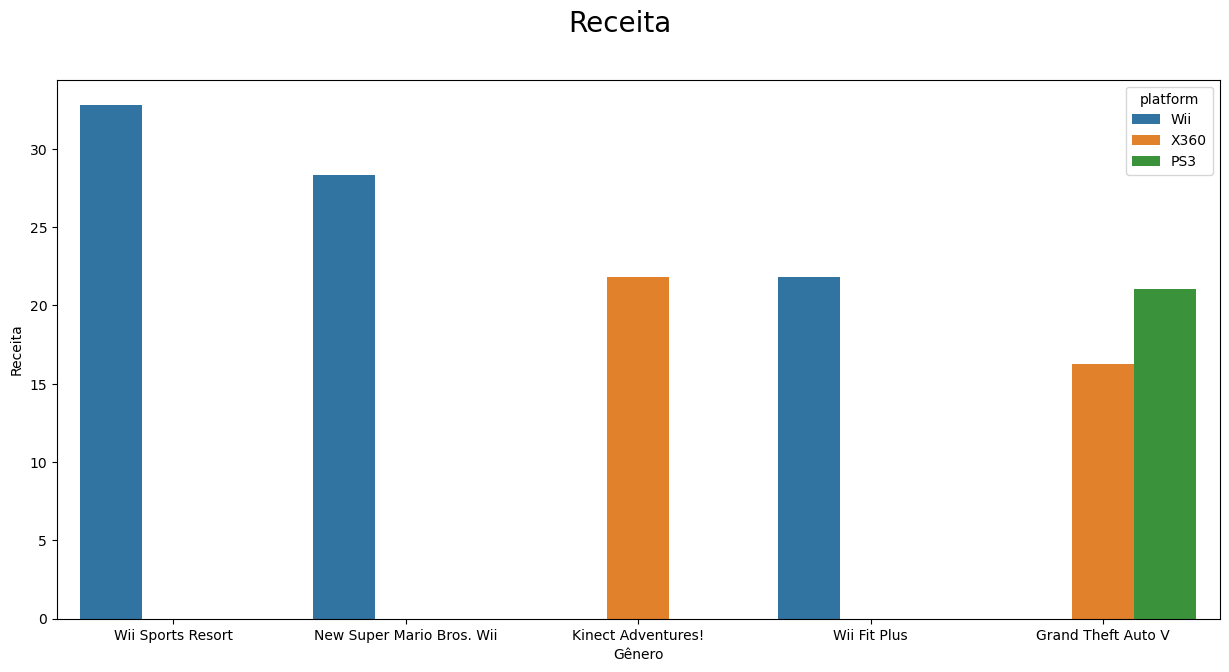

In [34]:
plt.figure(figsize=(15, 7))
plt.suptitle('Receita', fontsize= 20)

sns.barplot(data= df_dropped.query('year_of_release >= 2009').sort_values('total_sale', ascending=False).head(6), x='name', y='total_sale', hue='platform');
plt.xlabel("Gênero")
plt.ylabel("Receita")

plt.show;

### Com o lançamento da nova modalidade de interação com os jogos, o Wii foi um dos consoles que mais gerou receita, tanto com o Wii Sports, e o New Super Mario Bros. A linha dos kinects, Wii e Xbox 360 revolucionou o mundos dos games na época em que foram lançados, explicando a receita que que ainda em 2016 não foi batida individualmente pelas outras plataformas. O uníco game fora das linhas clássicas da Nintendo, que entra no ranking é o clássico GTA V.

In [35]:
df_group = df.groupby('platform')['total_sale'].agg(['mean','sum','median', 'std'])
df_group.sort_values(by='sum', ascending=False).head()

,mean,sum,median,std
platform,,,,
PS2,0.581106,1255.77,0.23,1.137927
X360,0.769746,971.42,0.28,1.615674
PS3,0.705973,939.65,0.27,1.391749
Wii,0.687508,907.51,0.19,3.126609
DS,0.374765,806.12,0.11,1.426451


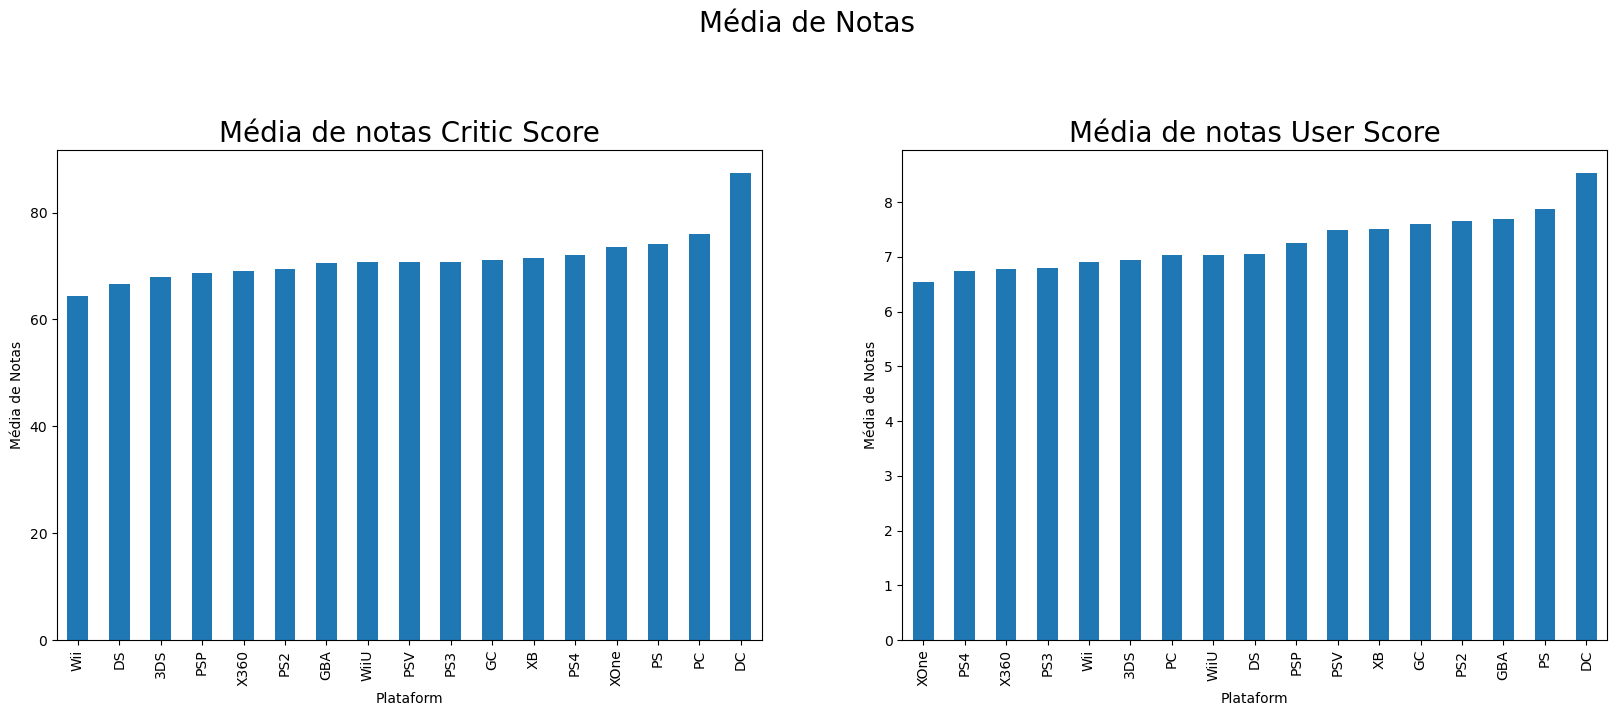

In [36]:
# Média de notas por Plataforma

plt.figure(figsize=(20, 14))
plt.suptitle('Média de Notas', fontsize= 20)

# Média de nota Critic Score
plt.subplot(2, 2, 1)
df.dropna(subset=['critic_score', 'user_score']).groupby('platform')['critic_score'].mean().sort_values().plot(kind='bar')
plt.title('Média de notas Critic Score', fontsize = 20)
plt.ylabel('Média de Notas')
plt.xlabel('Plataform');

# Média de nota User Score
plt.subplot(2,2,2)
df.dropna(subset=['critic_score', 'user_score']).groupby('platform')['user_score'].mean().sort_values().plot(kind='bar')
plt.title('Média de notas User Score', fontsize = 20)
plt.ylabel('Média de Notas')
plt.xlabel('Plataform');

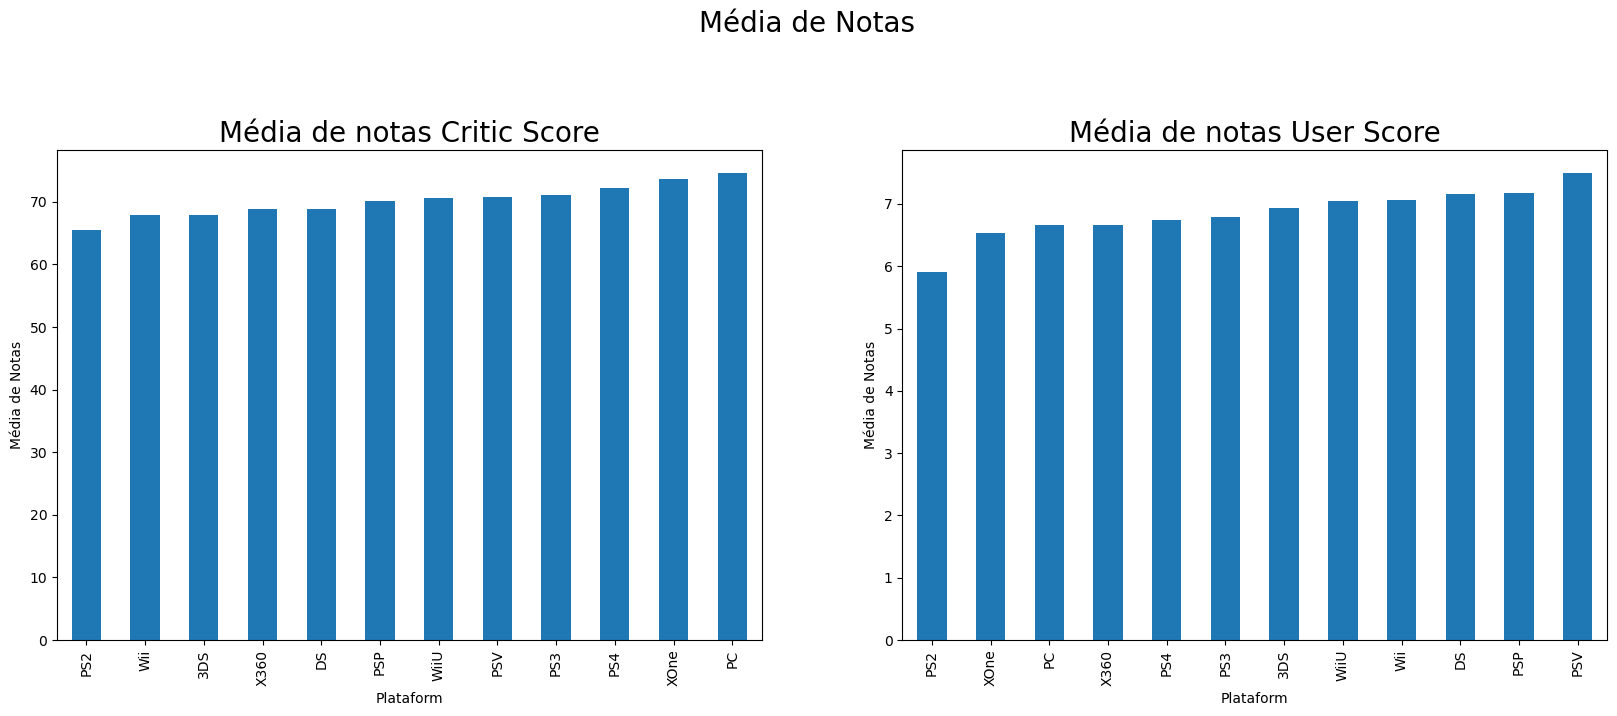

In [37]:
# Média de notas por Plataforma

plt.figure(figsize=(20, 14))
plt.suptitle('Média de Notas', fontsize= 20)

# Média de nota Critic Score
plt.subplot(2, 2, 1)
df.query('year_of_release >= 2009').dropna(subset=['critic_score', 'user_score']).groupby('platform')['critic_score'].mean().sort_values().plot(kind='bar')
plt.title('Média de notas Critic Score', fontsize = 20)
plt.ylabel('Média de Notas')
plt.xlabel('Plataform');

# Média de nota User Score
plt.subplot(2,2,2)
df.query('year_of_release >= 2009').dropna(subset=['critic_score', 'user_score']).groupby('platform')['user_score'].mean().sort_values().plot(kind='bar')
plt.title('Média de notas User Score', fontsize = 20)
plt.ylabel('Média de Notas')
plt.xlabel('Plataform');

### É nítida a diferença entre as plataformas com as melhores avaliações de jogos entre os Críticos e os Usuários.

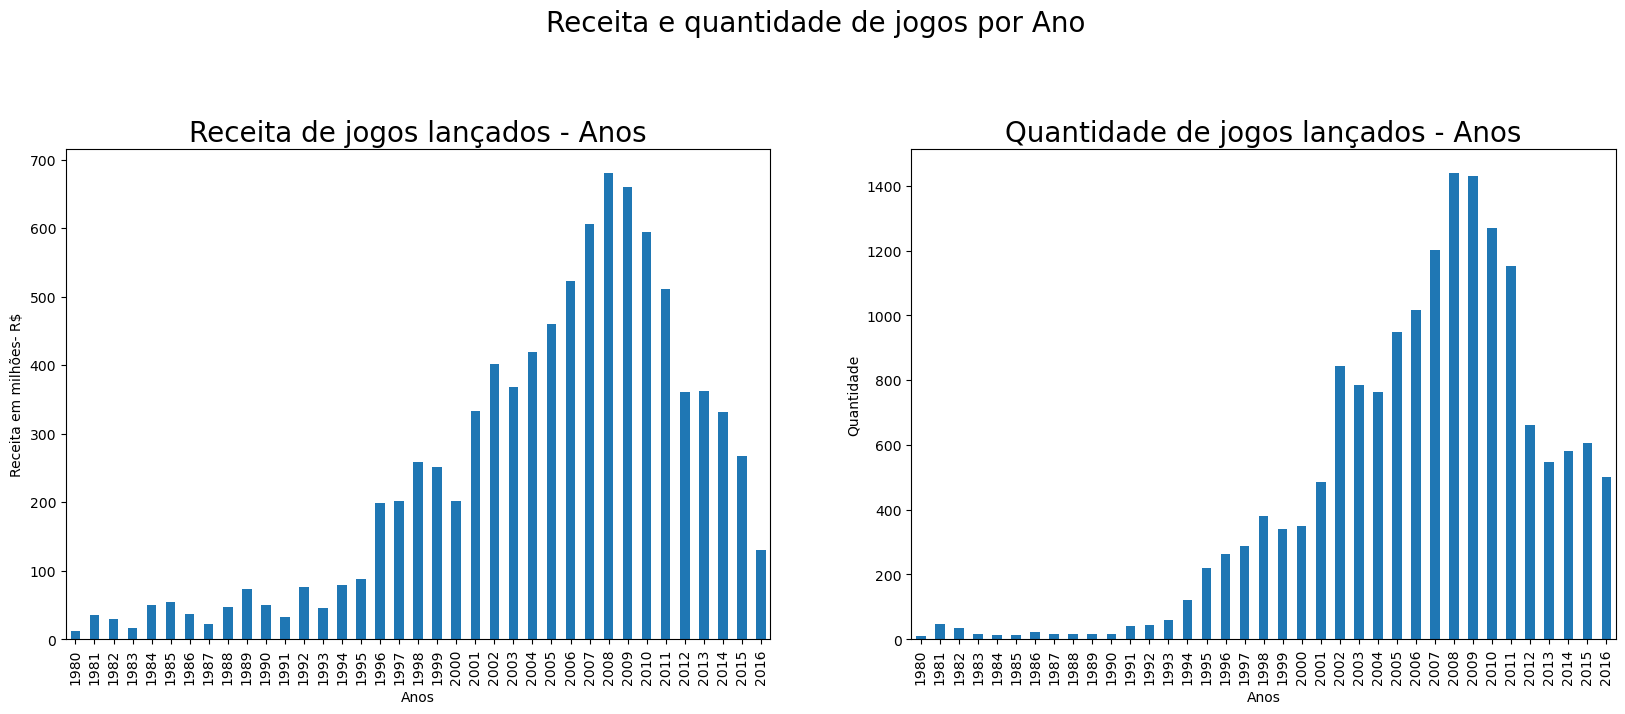

In [38]:
#Receita e quantidade de jogos por Ano

plt.figure(figsize=(20, 14))
plt.suptitle("Receita e quantidade de jogos por Ano", fontsize = 20)


#Jogos lançados por Ano
plt.subplot(2, 2, 1)
df_dropped.groupby('year_of_release')['total_sale'].sum().plot(kind='bar');
plt.title('Receita de jogos lançados - Anos', fontsize = 20)
plt.ylabel('Receita em milhões- R$')
plt.xlabel('Anos');

#Receita por ano
plt.subplot(2, 2, 2)
df_dropped.groupby('year_of_release')['genre'].count().plot(kind='bar');
plt.title('Quantidade de jogos lançados - Anos', fontsize = 20)
plt.ylabel('Quantidade')
plt.xlabel('Anos');

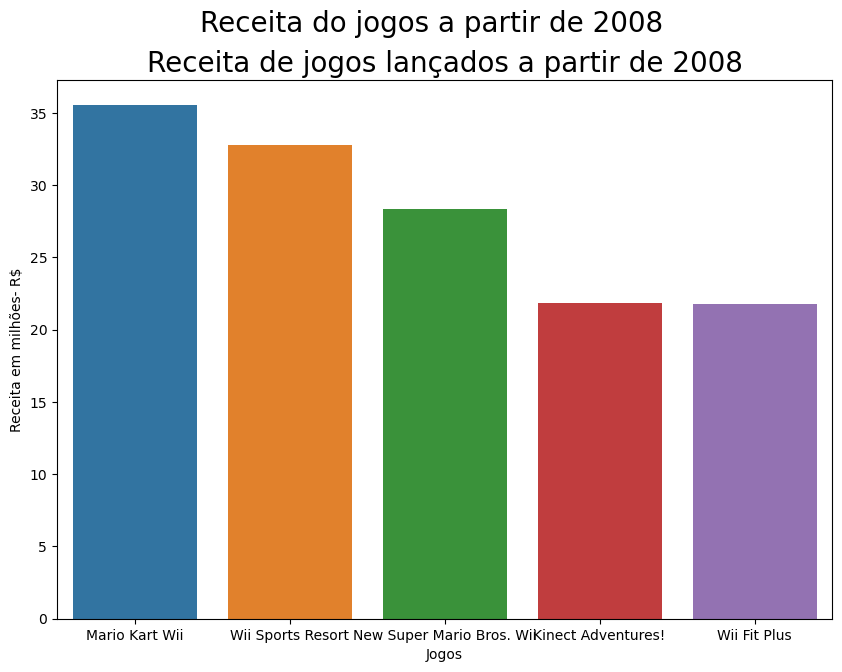

In [39]:
year_08 = df_dropped.query('year_of_release >= 2008').groupby(['name', 'platform'])['total_sale'].sum()
year_08 = year_08.reset_index().sort_values(by='total_sale', ascending=False)

plt.figure(figsize=(10, 7))
plt.suptitle("Receita do jogos a partir de 2008", fontsize = 20)


#Jogos lançados por Ano
sns.barplot(x= 'name', y='total_sale', data=year_08.head())
plt.title('Receita de jogos lançados a partir de 2008', fontsize = 20)
plt.ylabel('Receita em milhões- R$')
plt.xlabel('Jogos');

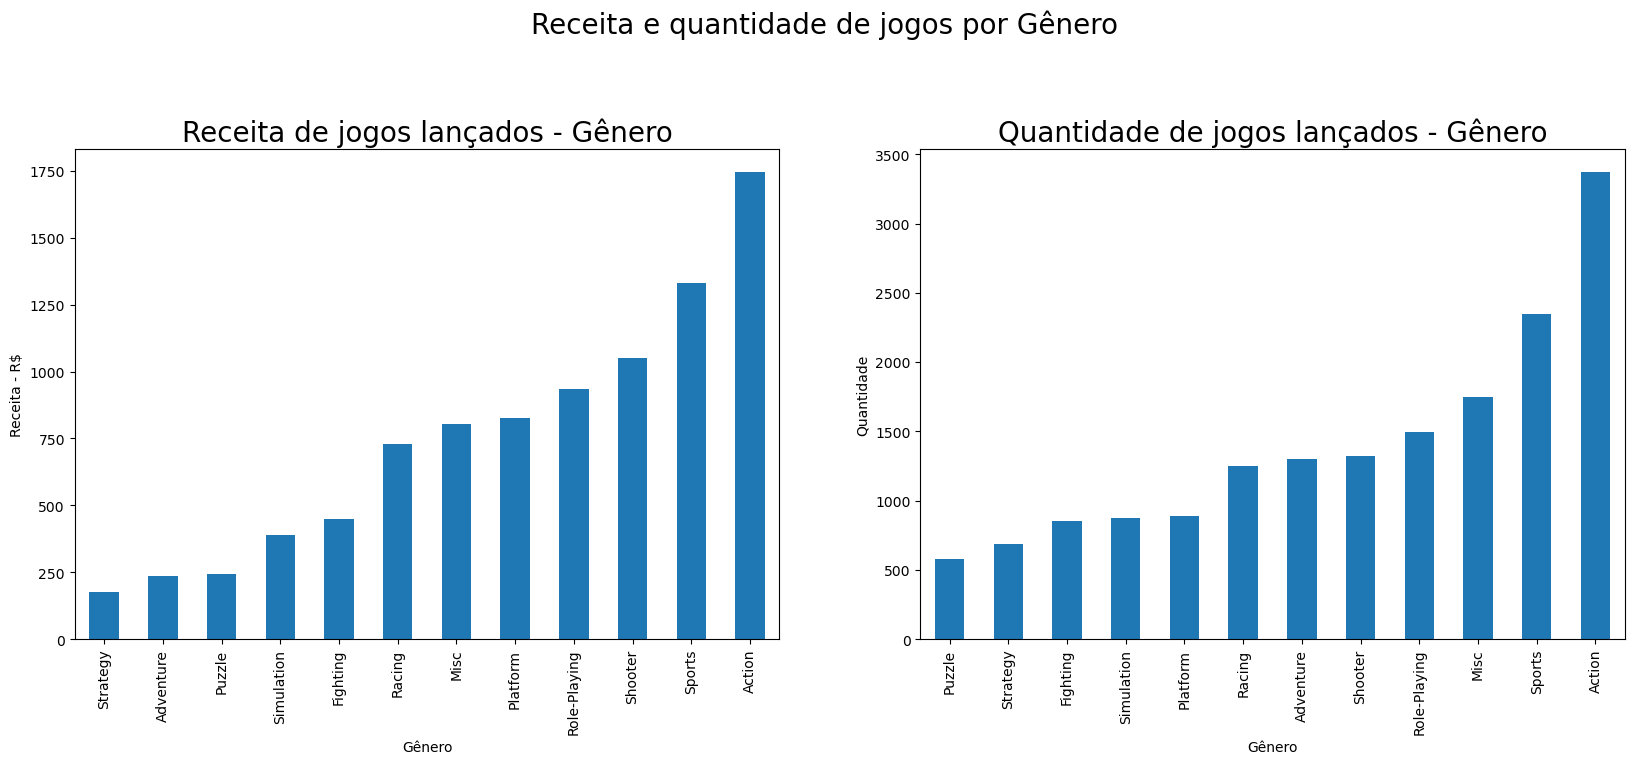

In [40]:
#Receita e quantidade de jogos por Gênero
plt.figure(figsize=(20, 14))
plt.suptitle("Receita e quantidade de jogos por Gênero", fontsize = 20)

# Receita dos jogos por Gênero
plt.subplot(2, 2, 1)
df.groupby('genre')['total_sale'].sum().sort_values().plot(kind='bar');
plt.title('Receita de jogos lançados - Gênero', fontsize = 20)
plt.ylabel('Receita - R$')
plt.xlabel('Gênero');

# Quantidade de jogos por Gênero
plt.subplot(2, 2, 2)
df.groupby('genre')['total_sale'].count().sort_values().plot(kind='bar');
plt.title('Quantidade de jogos lançados - Gênero', fontsize = 20)
plt.ylabel('Quantidade')
plt.xlabel('Gênero');

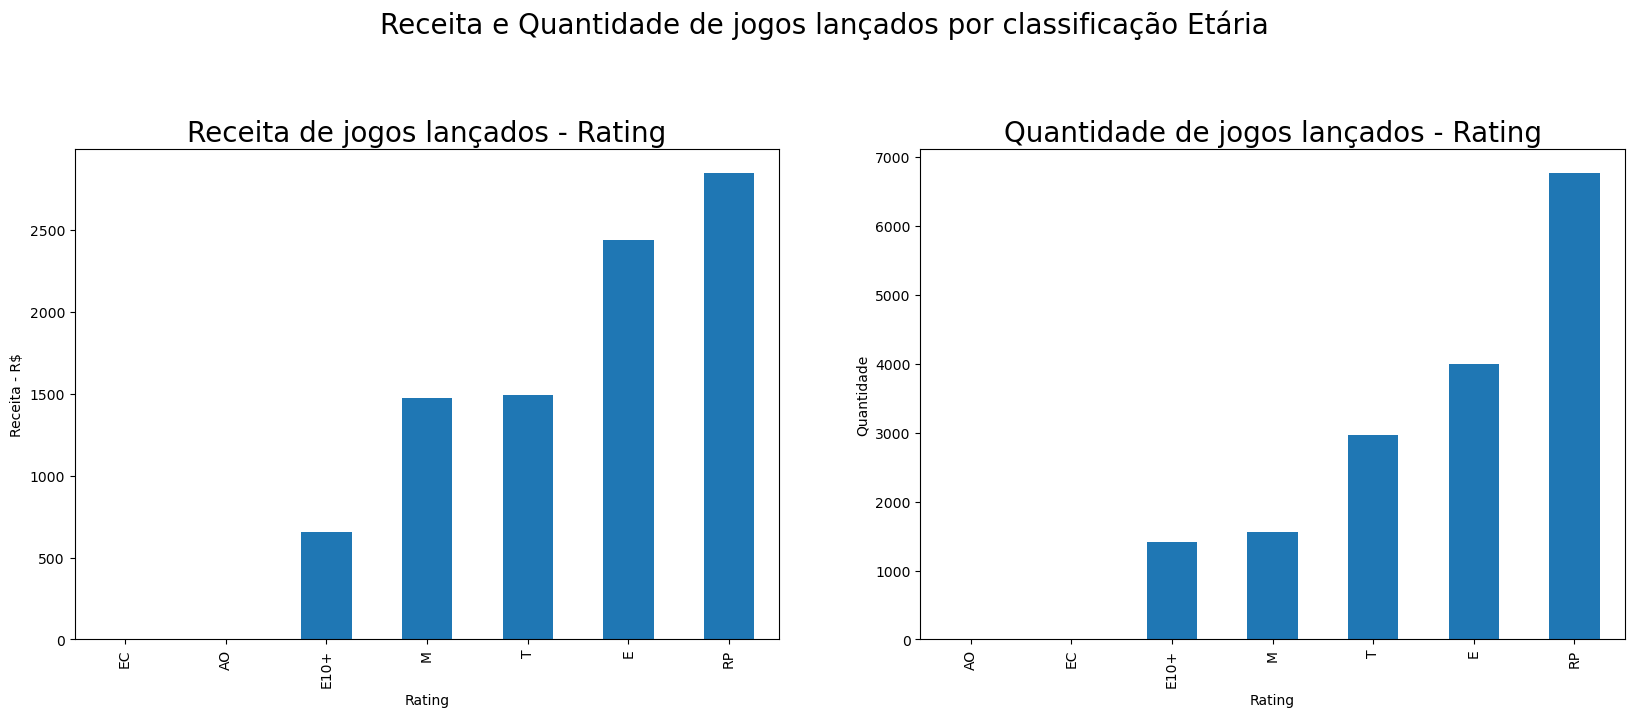

In [41]:
#Receita e Quantidade de jogos lançados por classificação Etária
plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por classificação Etária", fontsize= 20)

# Receita dos jogos vendidos por classificação Etária
plt.subplot(2, 2, 1)
df.groupby('rating')['total_sale'].sum().sort_values().plot(kind='bar');
plt.title('Receita de jogos lançados - Rating', fontsize = 20)
plt.ylabel('Receita - R$')
plt.xlabel('Rating');

# Quantidade de jogos lançados por classificação Etária
plt.subplot(2, 2, 2)
df.groupby('rating')['total_sale'].count().sort_values().plot(kind='bar');
plt.title('Quantidade de jogos lançados - Rating', fontsize = 20)
plt.ylabel('Quantidade')
plt.xlabel('Rating');

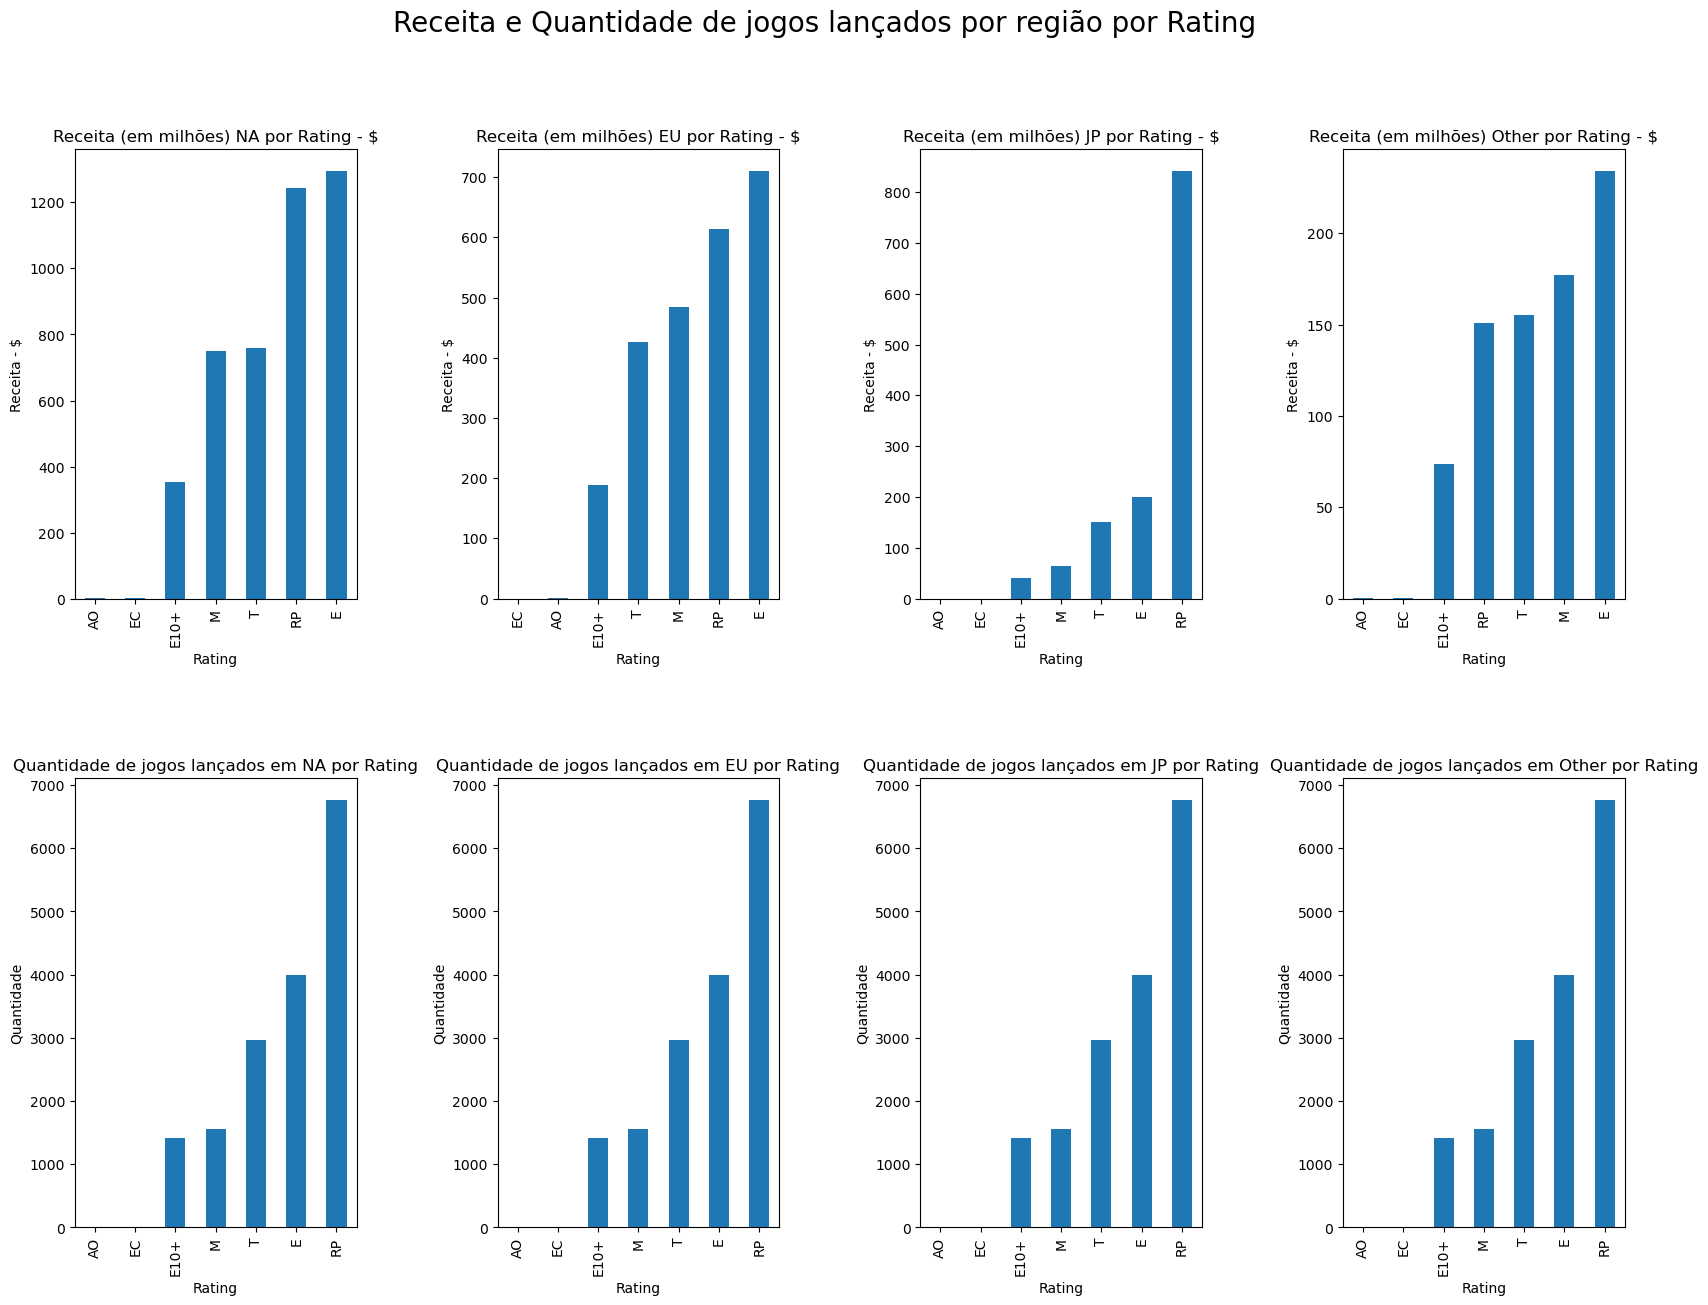

In [42]:
# Receita e Quantidade de jogos lançados por região por Rating
plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por Rating", fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=0.4)

plt.subplot(2, 4, 1)
df.groupby('rating')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por Rating - $")
plt.ylabel("Receita - $")
plt.xlabel("Rating")


plt.subplot(2, 4, 2)
df.groupby('rating')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por Rating - $")
plt.ylabel("Receita - $")
plt.xlabel("Rating")


plt.subplot(2, 4, 3)
df.groupby('rating')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por Rating - $")
plt.ylabel("Receita - $")
plt.xlabel("Rating")


plt.subplot(2, 4, 4)
df.groupby('rating')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por Rating - $")
plt.ylabel("Receita - $")
plt.xlabel("Rating")


plt.subplot(2, 4, 5)
df.groupby('rating')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por Rating")
plt.ylabel("Quantidade")
plt.xlabel("Rating")


plt.subplot(2, 4, 6)
df.groupby('rating')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por Rating")
plt.ylabel("Quantidade")
plt.xlabel("Rating")


plt.subplot(2, 4, 7)
df.groupby('rating')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por Rating")
plt.ylabel("Quantidade")
plt.xlabel("Rating")


plt.subplot(2, 4, 8)
df.groupby('rating')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por Rating")
plt.ylabel("Quantidade")
plt.xlabel("Rating")

plt.show();


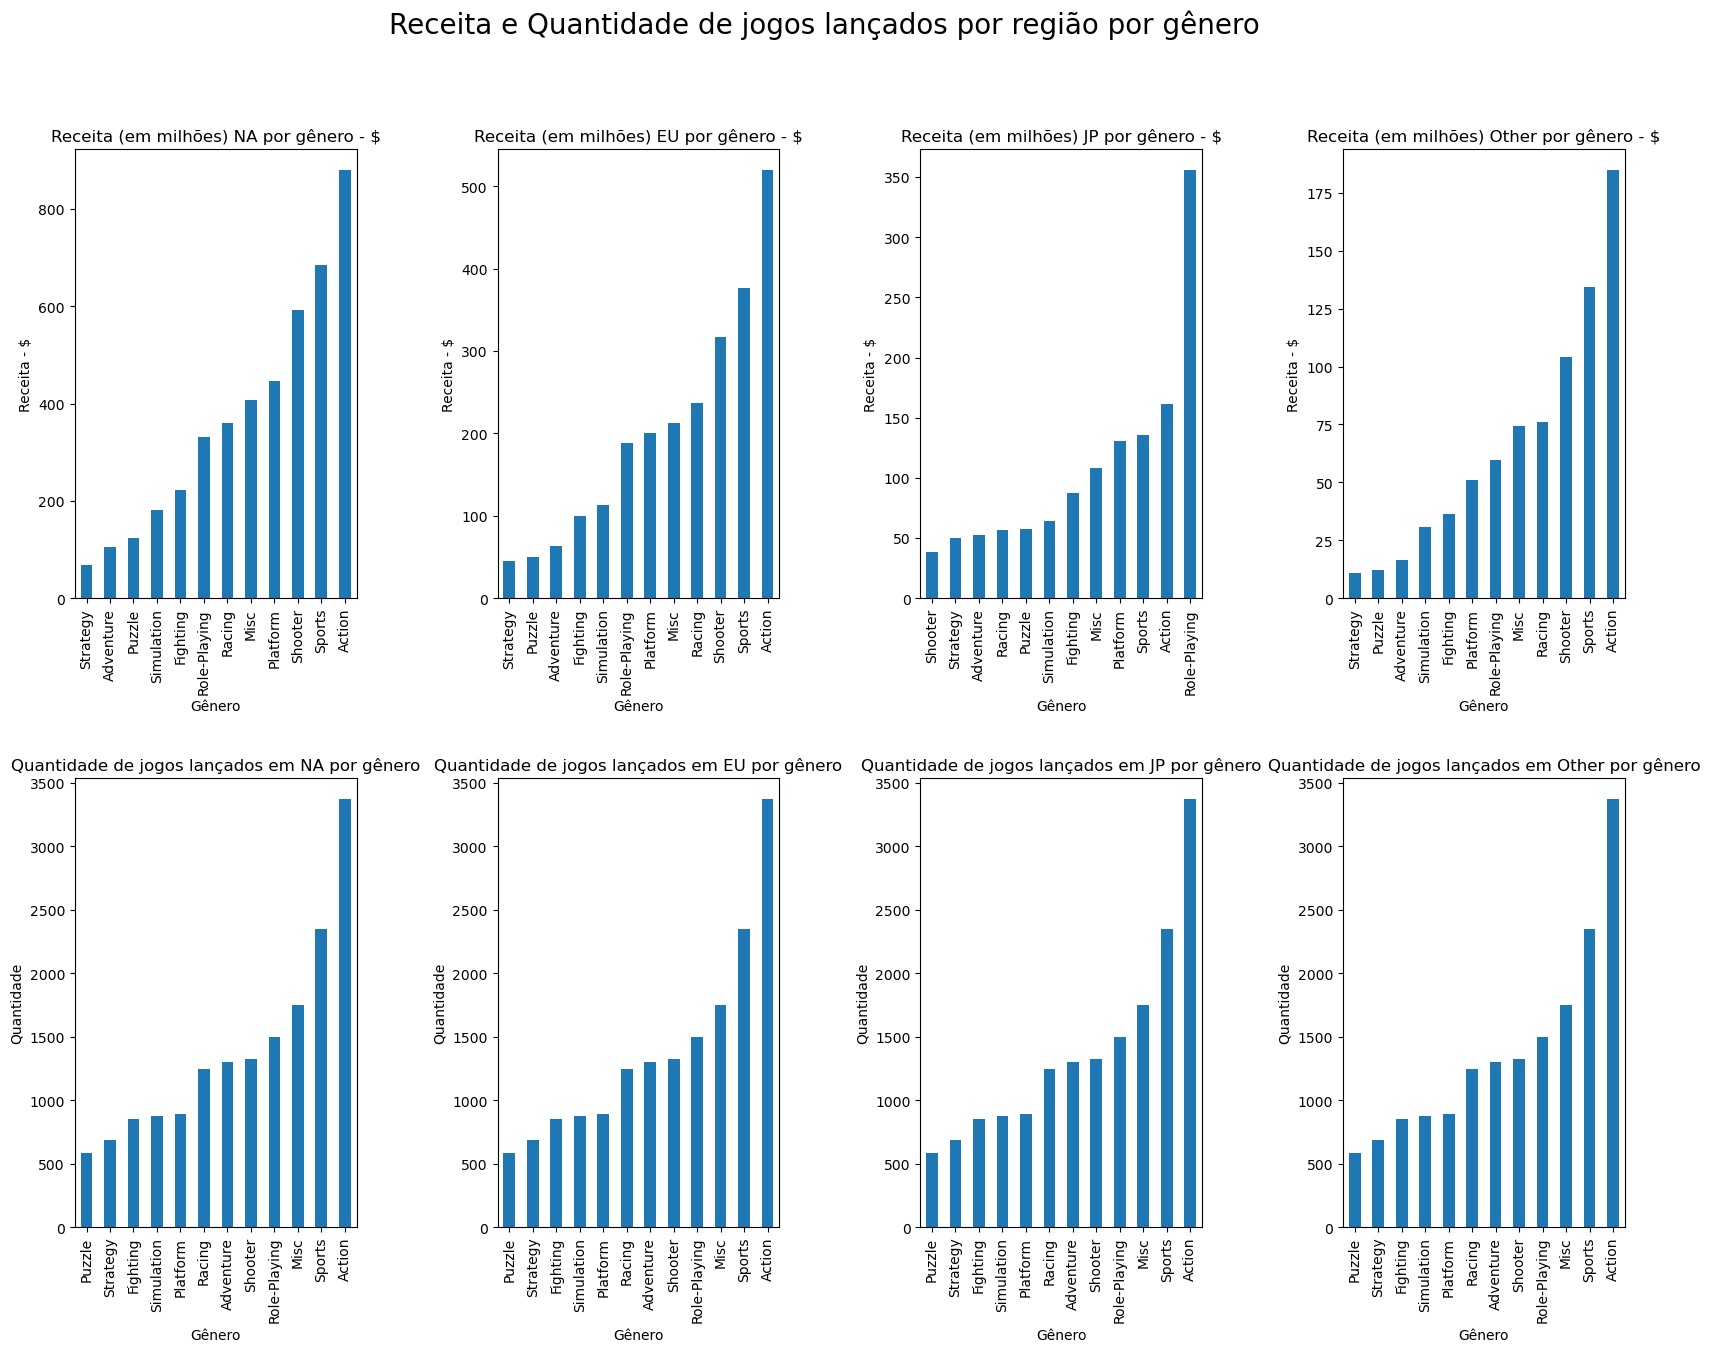

In [43]:
# Receita e Quantidade de jogos lançados por região por gênero
plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por gênero", fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=0.4)

plt.subplot(2, 4, 1)
df.groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por gênero - $")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 2)
df.groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por gênero - $")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 3)
df.groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por gênero - $")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 4)
df.groupby('genre')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por gênero - $")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 5)
df.groupby('genre')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 6)
df.groupby('genre')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 7)
df.groupby('genre')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 8)
df.groupby('genre')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

plt.show();



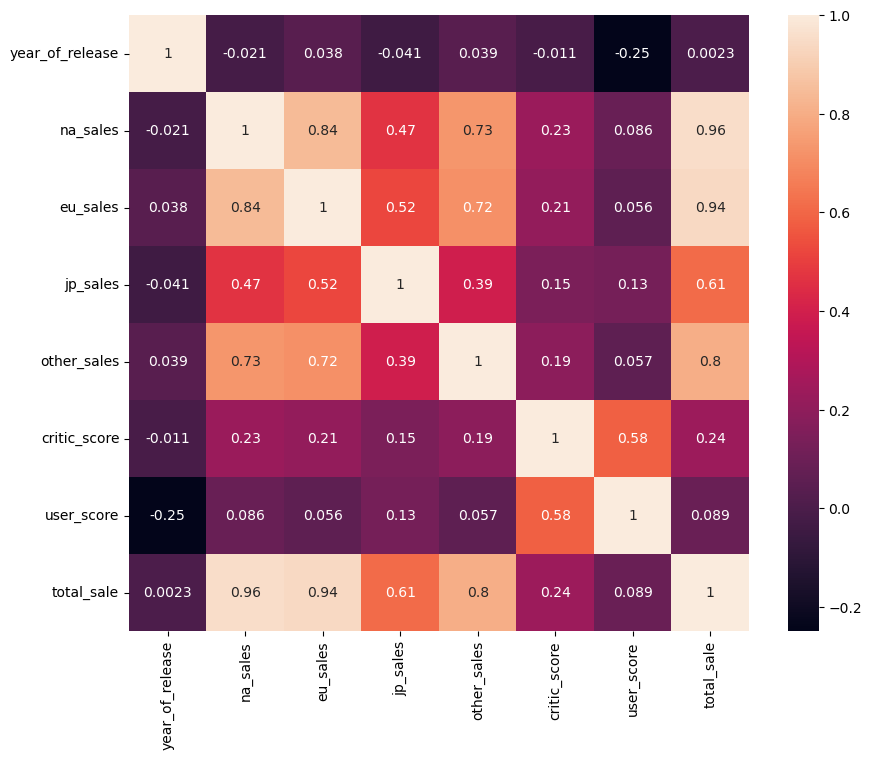

In [44]:
# Correlação do DataFrame original

hm = sns.heatmap(df.dropna(subset=['critic_score','user_score']).corr(), annot=True);
hm.figure.set_size_inches(10, 8)

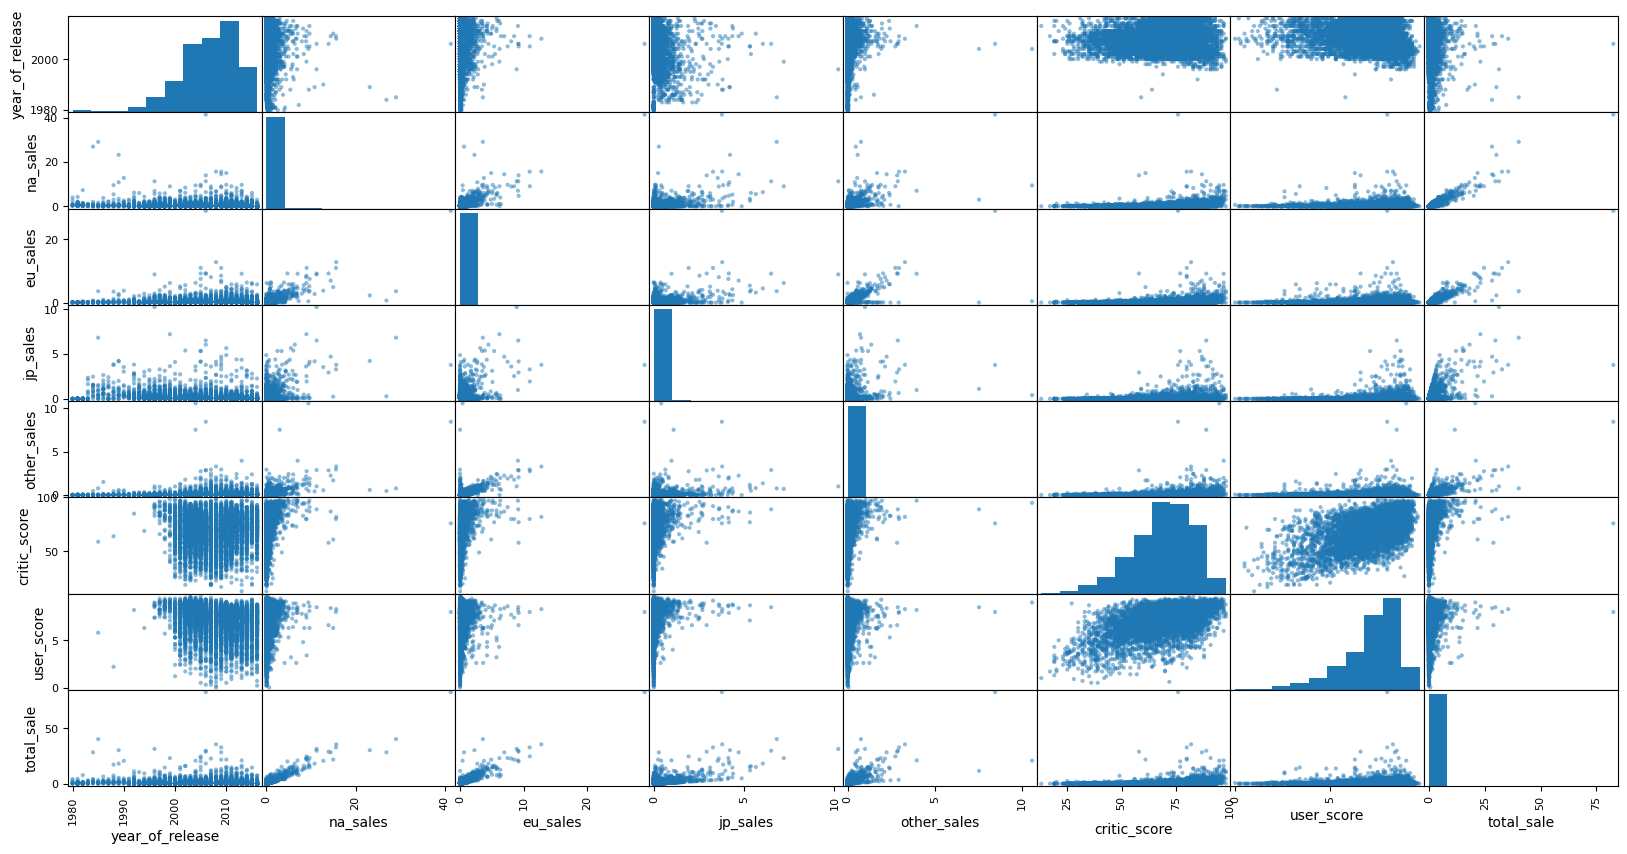

In [45]:
# Matriz de correlação do DataFrame filtrado
pd.plotting.scatter_matrix(df_dropped, figsize=(20, 10));

### Avaliando a coreleção dos jogos e a quantidade de receita e a quantidade de lançamento por classificação etária, concluí-se que não há uma correlação grande, ou não há correlação entre a classificação etária dos jogos com a quantidade de receita gerada. O que mais poderia se correlacionar sãos os títulos o "hype" que os grandes nomes das grandiosas franquias geram no público. 


### Nem as notas dos críticos ou dos usuários parecem influenciar tanto nas vendas dos jogos. Mesmo isso sendo, teoricamente, um fator importante na decisão de compra por parte de algum usuários. 

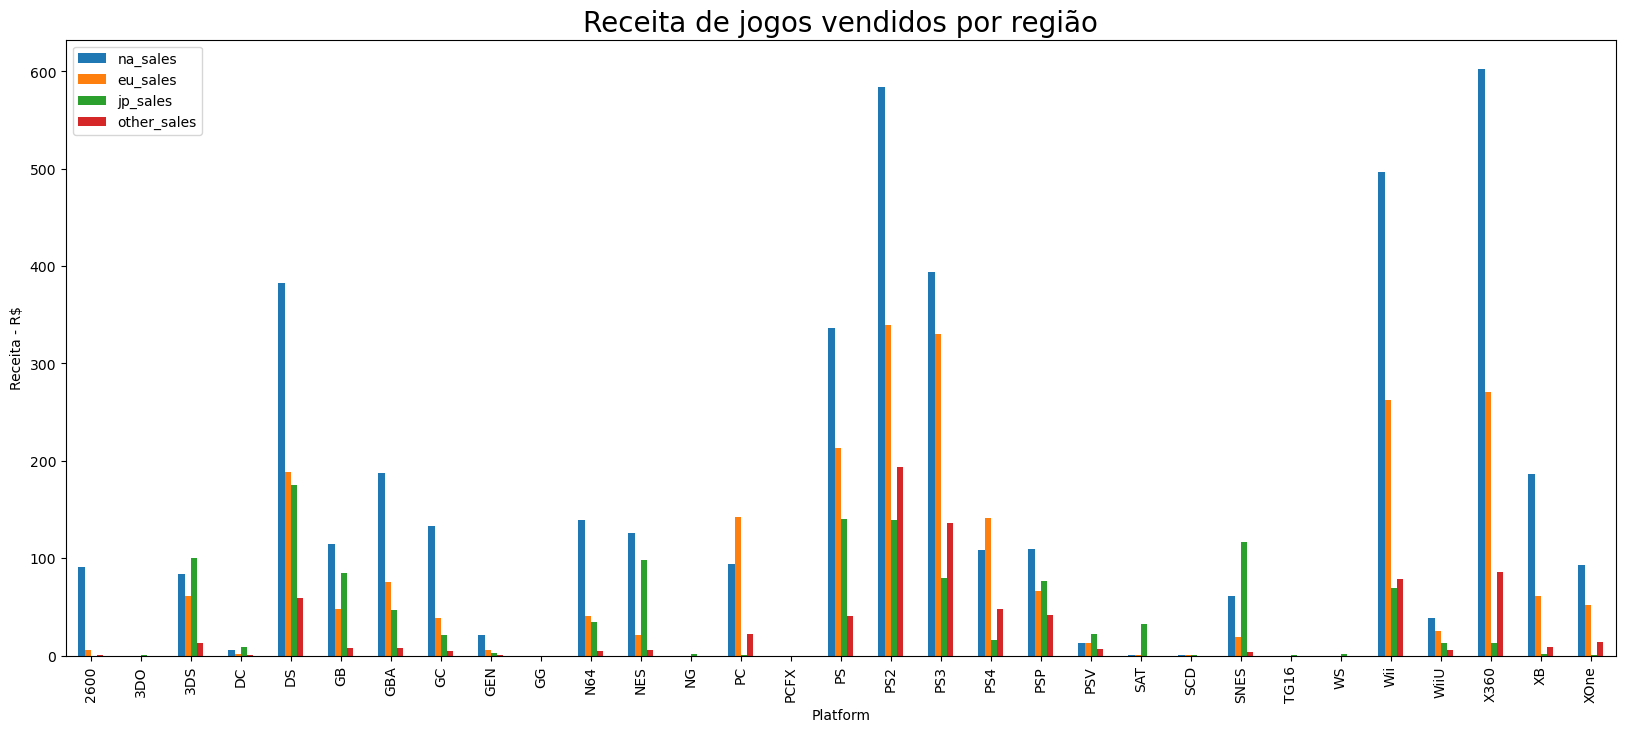

In [46]:
#Receita de jogos vendidos por região
df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum().plot(kind='bar', figsize= (20, 8));
plt.title('Receita de jogos vendidos por região', fontsize = 20)
plt.ylabel('Receita - R$')
plt.xlabel('Platform');

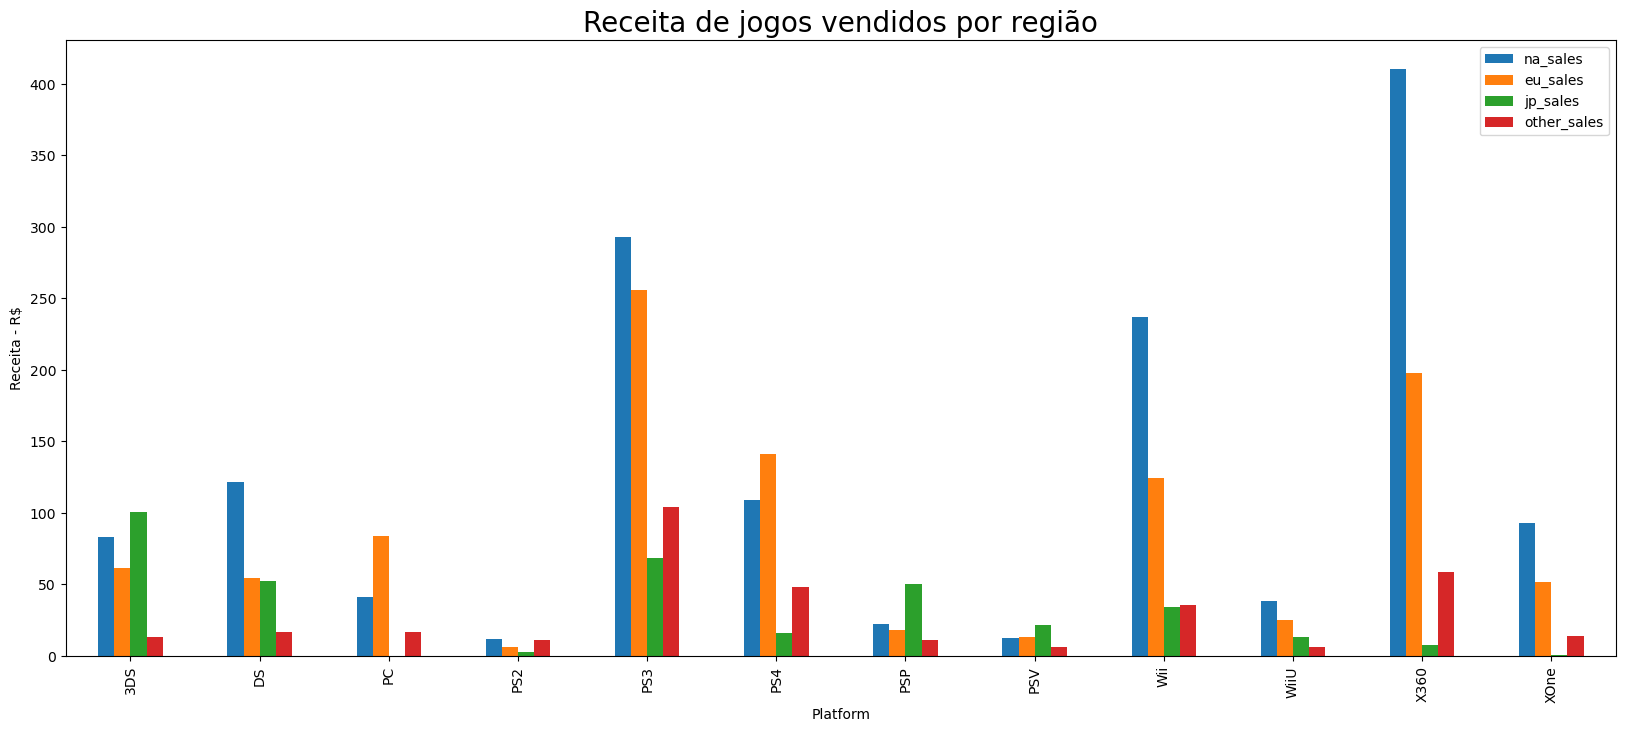

In [47]:
#Receita de jogos vendidos por região
df.query('year_of_release >= 2009').groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum().plot(kind='bar', figsize= (20, 8));
plt.title('Receita de jogos vendidos por região', fontsize = 20)
plt.ylabel('Receita - R$')
plt.xlabel('Platform');

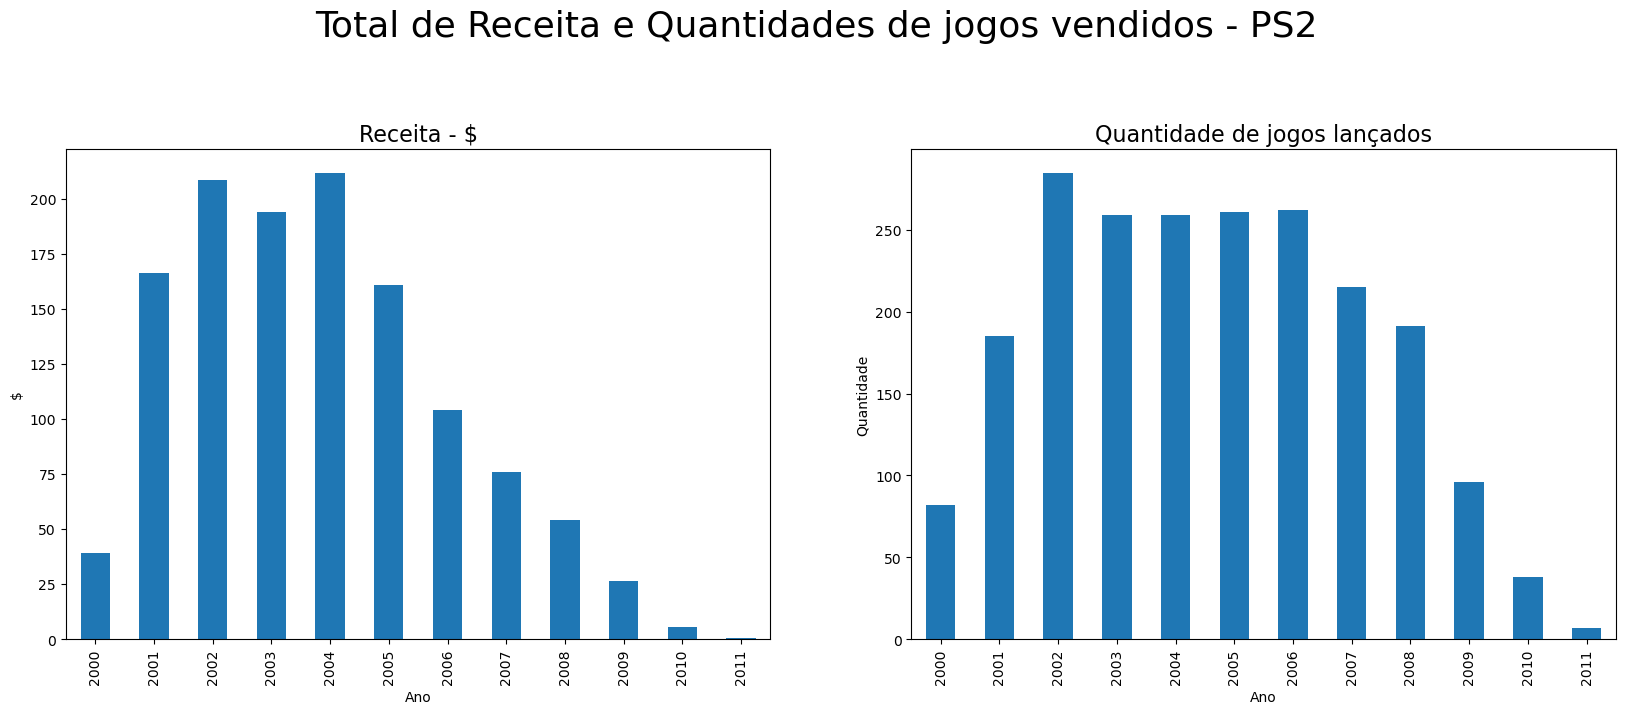

In [48]:
#Total de Receita e Quantidades de jogos vendidos - PS2
plt.figure(figsize = ((20, 14)))
plt.suptitle("Total de Receita e Quantidades de jogos vendidos - PS2", fontsize = 26)

#Receita
plt.subplot(2,2,1)
ax1 = df_dropped.query("platform == 'PS2'").groupby('year_of_release')['total_sale'].sum().plot(kind='bar');
plt.title('Receita - $', fontsize = 16)
plt.ylabel('$')
plt.xlabel('Ano');

#Quantidade de jogos vendidos
plt.subplot(2, 2, 2)
ax2 = df_dropped.query("platform == 'PS2'").groupby('year_of_release')['total_sale'].count().plot(kind='bar');
plt.title('Quantidade de jogos lançados', fontsize = 16)
plt.ylabel('Quantidade')
plt.xlabel('Ano');


plt.show()

Text(0.5, 0, 'Gênero')

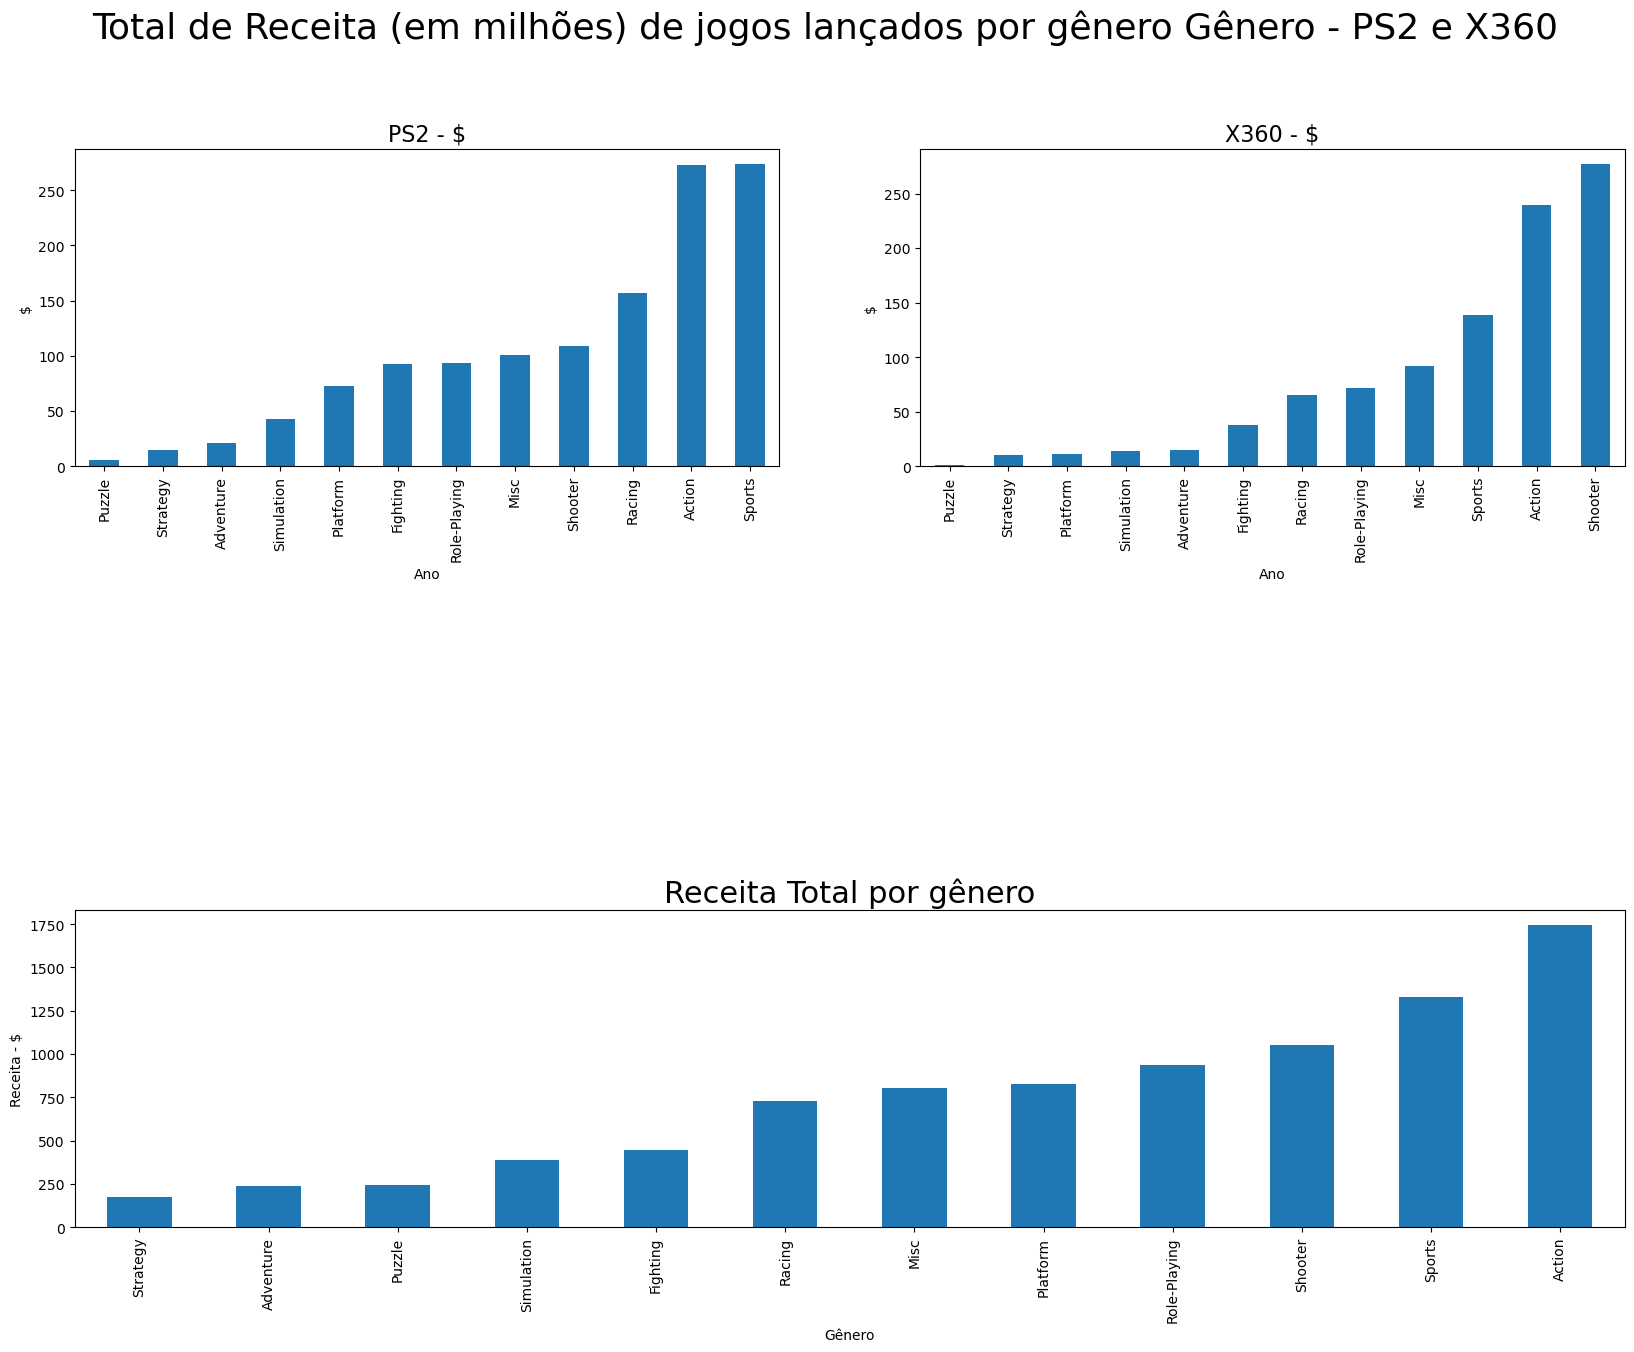

In [49]:
# Total de Receita e Quantidades de jogos lançados por gênero Gênero - PS2 e X360"

plt.figure(figsize = ((20, 14)))
plt.suptitle("Total de Receita (em milhões) de jogos lançados por gênero Gênero - PS2 e X360", fontsize = 26)

# PS2
plt.subplot(3, 2, 1)
df.query("platform == 'PS2'").groupby('genre')['total_sale'].sum().sort_values().plot(kind='bar');
plt.title('PS2 - $', fontsize = 16)
plt.ylabel('$')
plt.xlabel('Ano');

# X360
plt.subplot(3, 2, 2)
df.query("platform == 'X360'").groupby('genre')['total_sale'].sum().sort_values().plot(kind='bar');
plt.title('X360 - $', fontsize = 16)
plt.ylabel('$')
plt.xlabel('Ano');

# Receita Total por gênero
plt.subplot(3, 1, 3)
df.groupby('genre')['total_sale'].sum().sort_values().plot(kind='bar')
plt.title('Receita Total por gênero', fontsize = 22)
plt.ylabel('Receita - $')
plt.xlabel('Gênero')

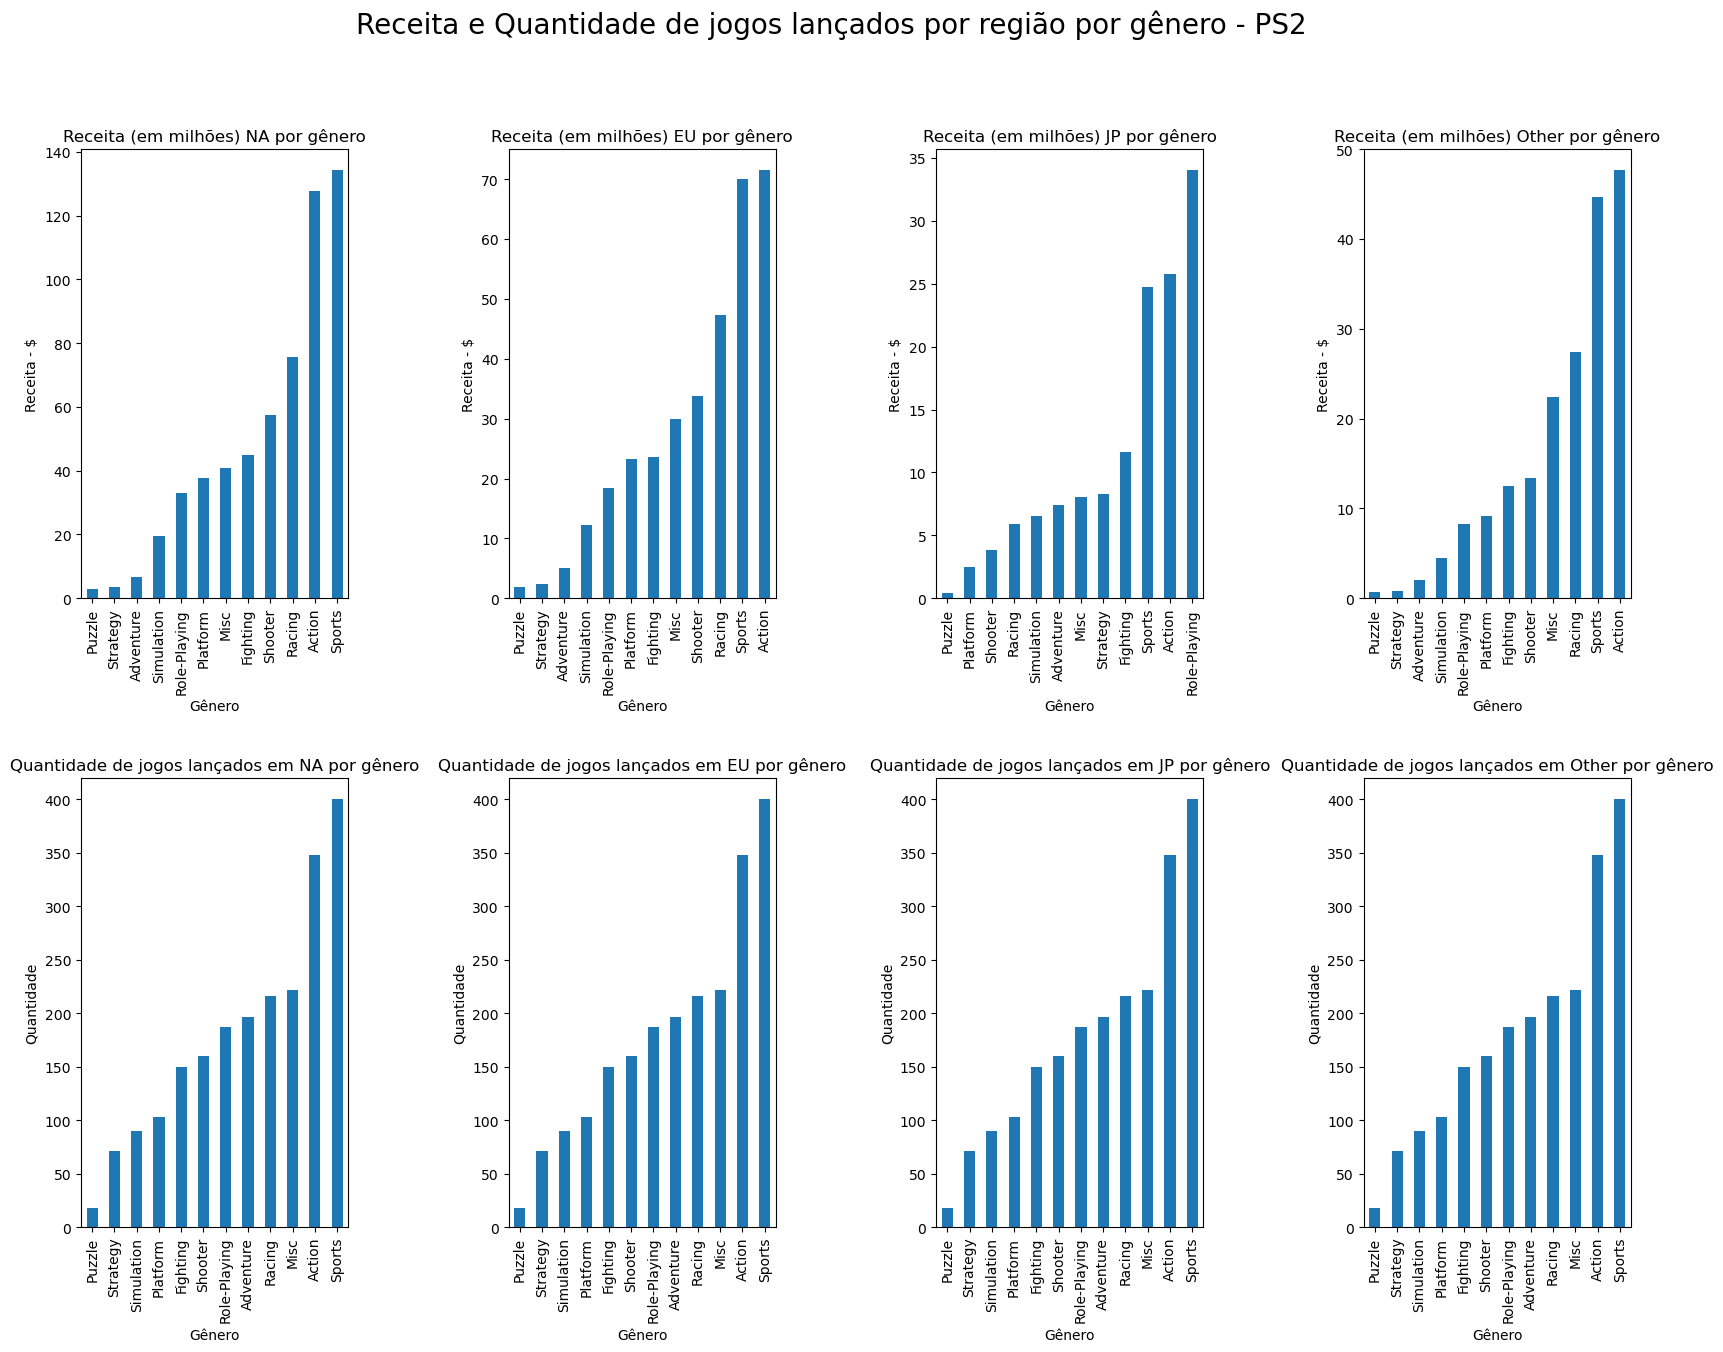

In [50]:
# Receita e Quantidade de jogos lançados por região por gênero PS2

plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por gênero - PS2", fontsize=20)
plt.subplots_adjust(wspace=.6, hspace=.4)

plt.subplot(2, 4, 1)
df.query('platform == "PS2"').groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 2)
df.query('platform == "PS2"').groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por gênero" )
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 3)
df.query('platform == "PS2"').groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 4)
df.query('platform == "PS2"').groupby('genre')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 5)
df.query('platform == "PS2"').groupby('genre')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 6)
df.query('platform == "PS2"').groupby('genre')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 7)
df.query('platform == "PS2"').groupby('genre')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 8)
df.query('platform == "PS2"').groupby('genre')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

plt.show();

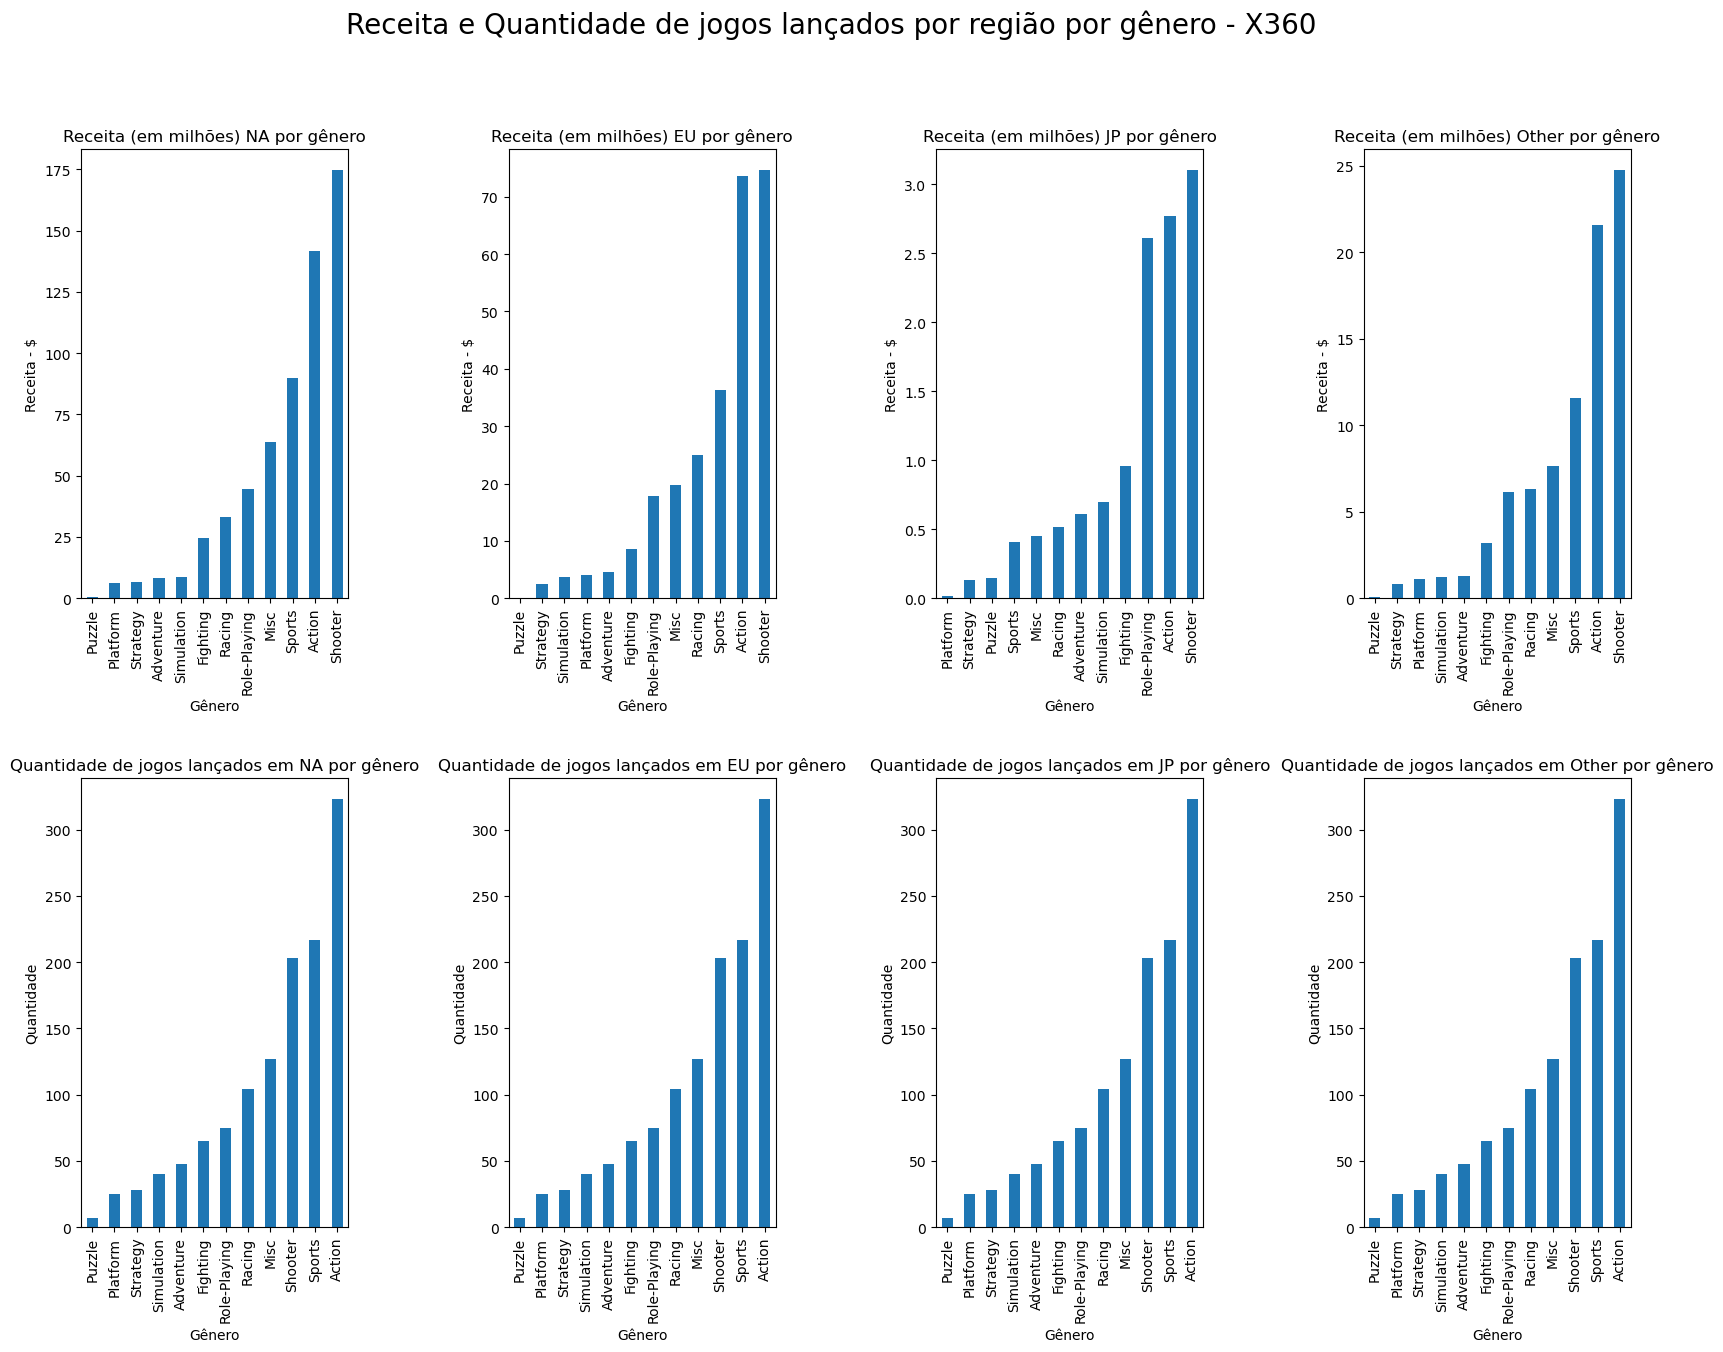

In [51]:
# Receita e Quantidade de jogos lançados por região por gênero X360

plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por gênero - X360", fontsize=20)
plt.subplots_adjust(wspace=.6, hspace=.4)

plt.subplot(2, 4, 1)
df.query('platform == "X360"').groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 2)
df.query('platform == "X360"').groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por gênero" )
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 3)
df.query('platform == "X360"').groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 4)
df.query('platform == "X360"').groupby('genre')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 5)
df.query('platform == "X360"').groupby('genre')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 6)
df.query('platform == "X360"').groupby('genre')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 7)
df.query('platform == "X360"').groupby('genre')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 8)
df.query('platform == "X360"').groupby('genre')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

plt.show();

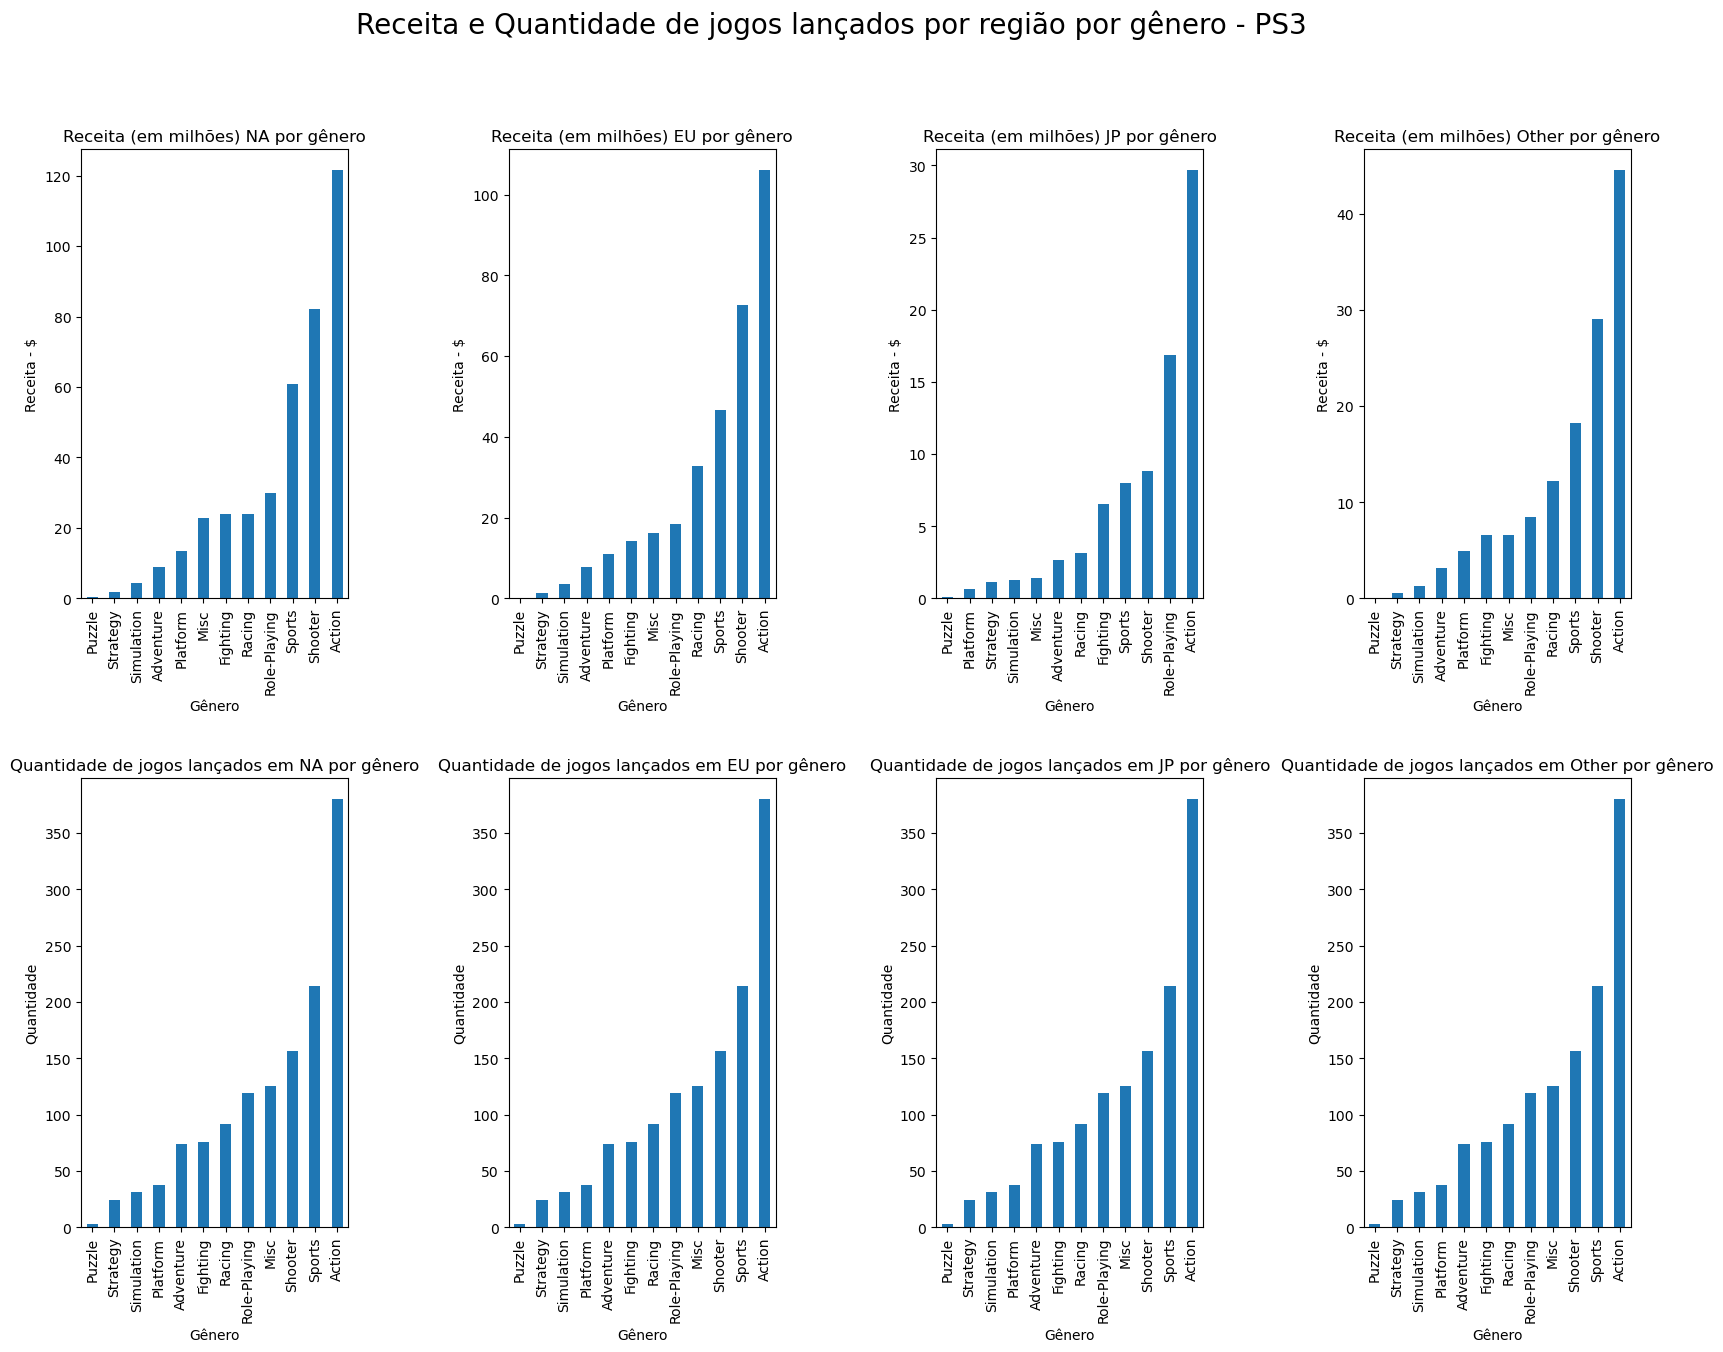

In [52]:
# Receita e Quantidade de jogos lançados por região por gênero PS3

plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por gênero - PS3", fontsize=20)
plt.subplots_adjust(wspace=.6, hspace=.4)

plt.subplot(2, 4, 1)
df.query('platform == "PS3"').groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 2)
df.query('platform == "PS3"').groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por gênero" )
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 3)
df.query('platform == "PS3"').groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 4)
df.query('platform == "PS3"').groupby('genre')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 5)
df.query('platform == "PS3"').groupby('genre')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 6)
df.query('platform == "PS3"').groupby('genre')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 7)
df.query('platform == "PS3"').groupby('genre')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 8)
df.query('platform == "PS3"').groupby('genre')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

plt.show();

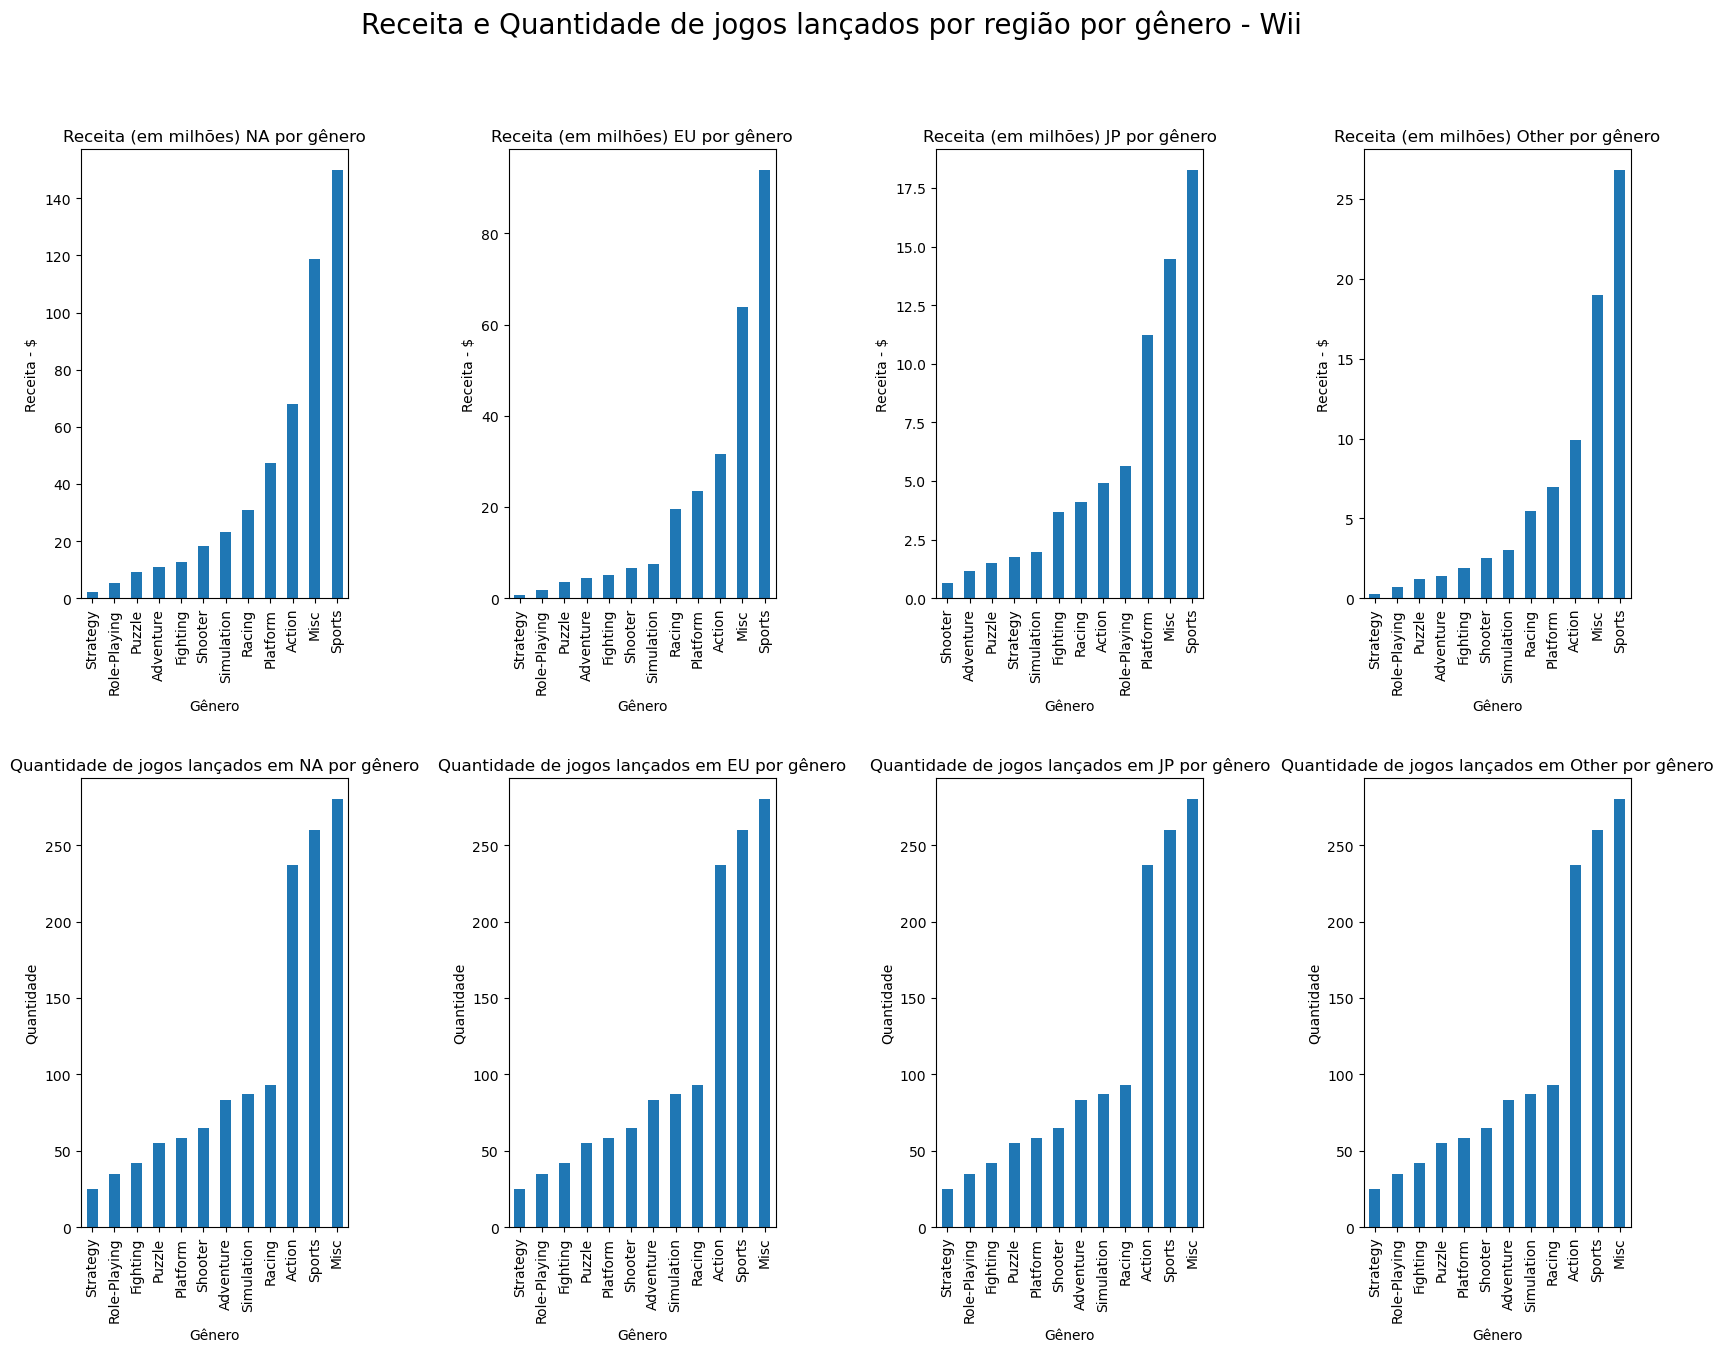

In [53]:
# Receita e Quantidade de jogos lançados por região por gênero Wii

plt.figure(figsize=(20, 14))
plt.suptitle("Receita e Quantidade de jogos lançados por região por gênero - Wii", fontsize=20)
plt.subplots_adjust(wspace=.6, hspace=.4)

plt.subplot(2, 4, 1)
df.query('platform == "Wii"').groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) NA por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 2)
df.query('platform == "Wii"').groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) EU por gênero" )
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 3)
df.query('platform == "Wii"').groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) JP por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 4)
df.query('platform == "Wii"').groupby('genre')['other_sales'].sum().sort_values().plot(kind='bar')
plt.title("Receita (em milhões) Other por gênero")
plt.ylabel("Receita - $")
plt.xlabel("Gênero")


plt.subplot(2, 4, 5)
df.query('platform == "Wii"').groupby('genre')['na_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em NA por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 6)
df.query('platform == "Wii"').groupby('genre')['eu_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em EU por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 7)
df.query('platform == "Wii"').groupby('genre')['jp_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em JP por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")


plt.subplot(2, 4, 8)
df.query('platform == "Wii"').groupby('genre')['other_sales'].count().sort_values().plot(kind='bar')
plt.title("Quantidade de jogos lançados em Other por gênero")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

plt.show();

In [54]:
IQR_total_sale = (df['total_sale'].quantile(.75))-(df['total_sale'].quantile(0.25))
IQR_total_max = (df['total_sale'].quantile(.75) + 1.5*IQR_total_sale)
IQR_total_min = (df['total_sale'].quantile(.25) - 1.5*IQR_total_sale)



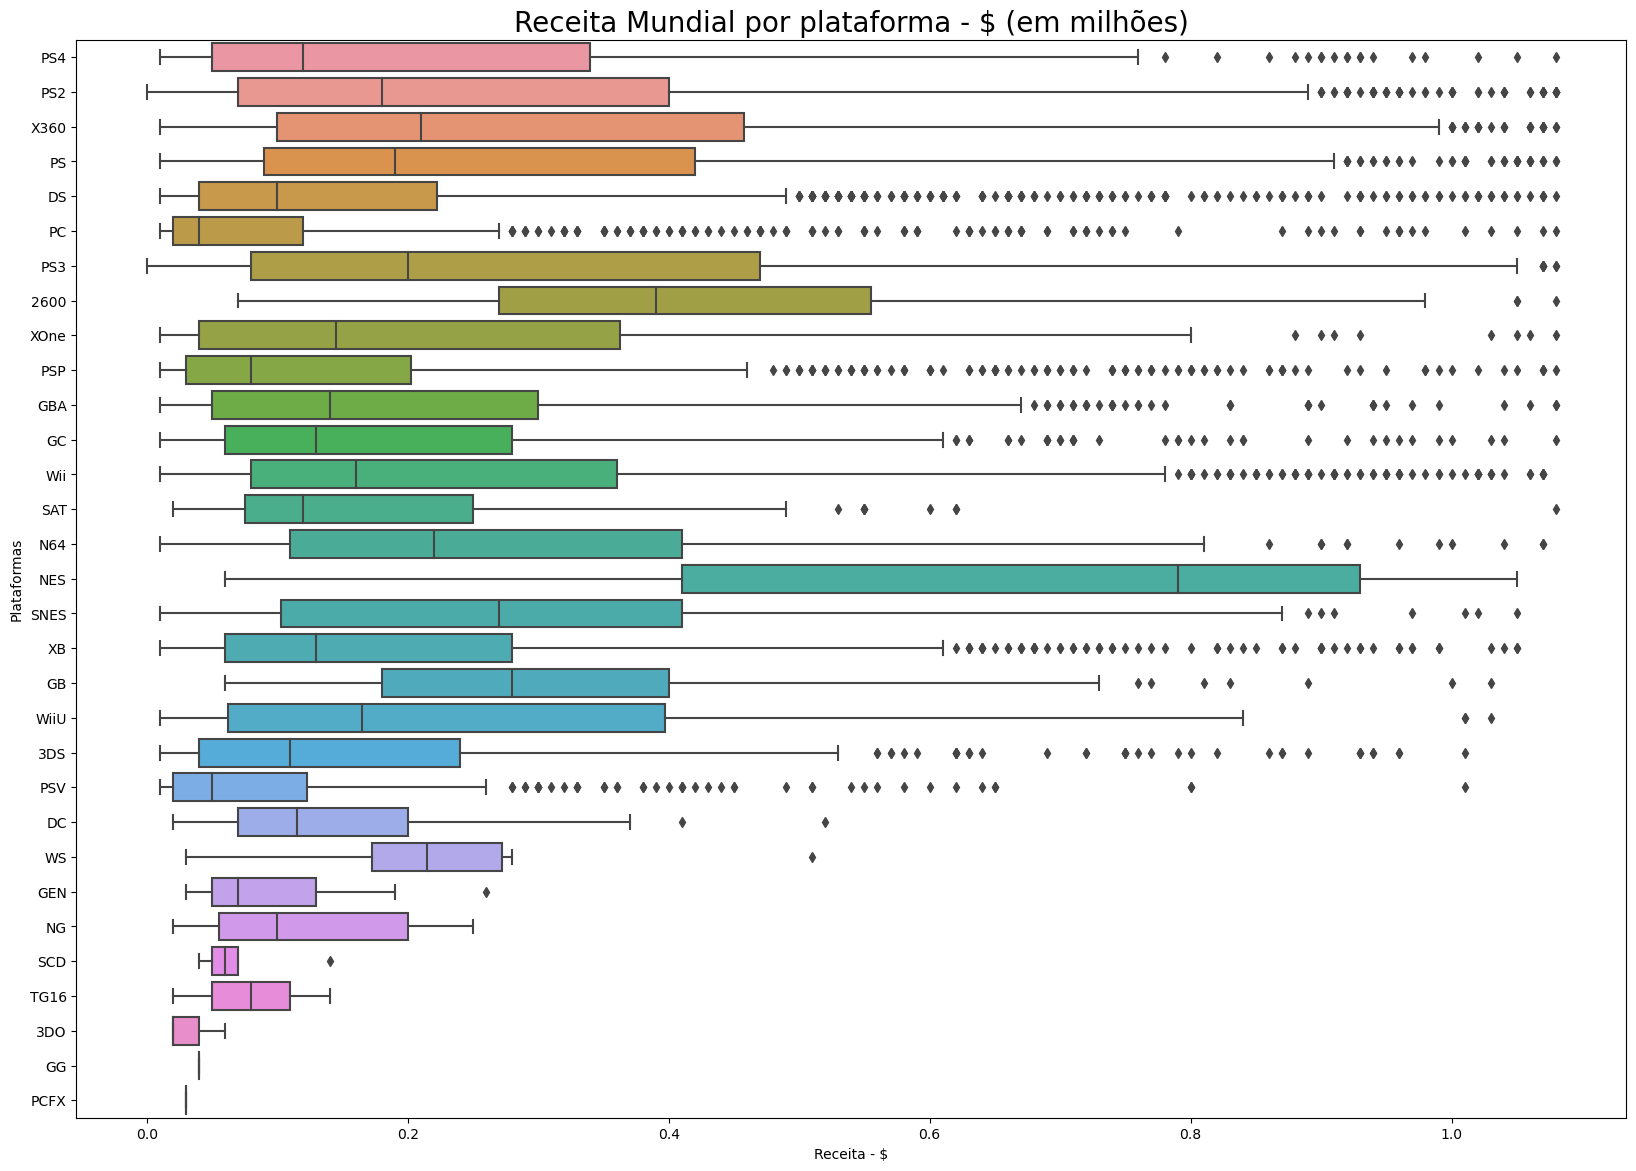

In [55]:
# Receita Mundial por plataforma

plt.figure(figsize=(20, 14))
plt.title("Receita Mundial por plataforma - $ (em milhões)" , fontsize=20)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max'), x='total_sale', y='platform', orient='h')
plt.xlabel("Receita - $")
plt.ylabel('Plataformas')
plt.show()






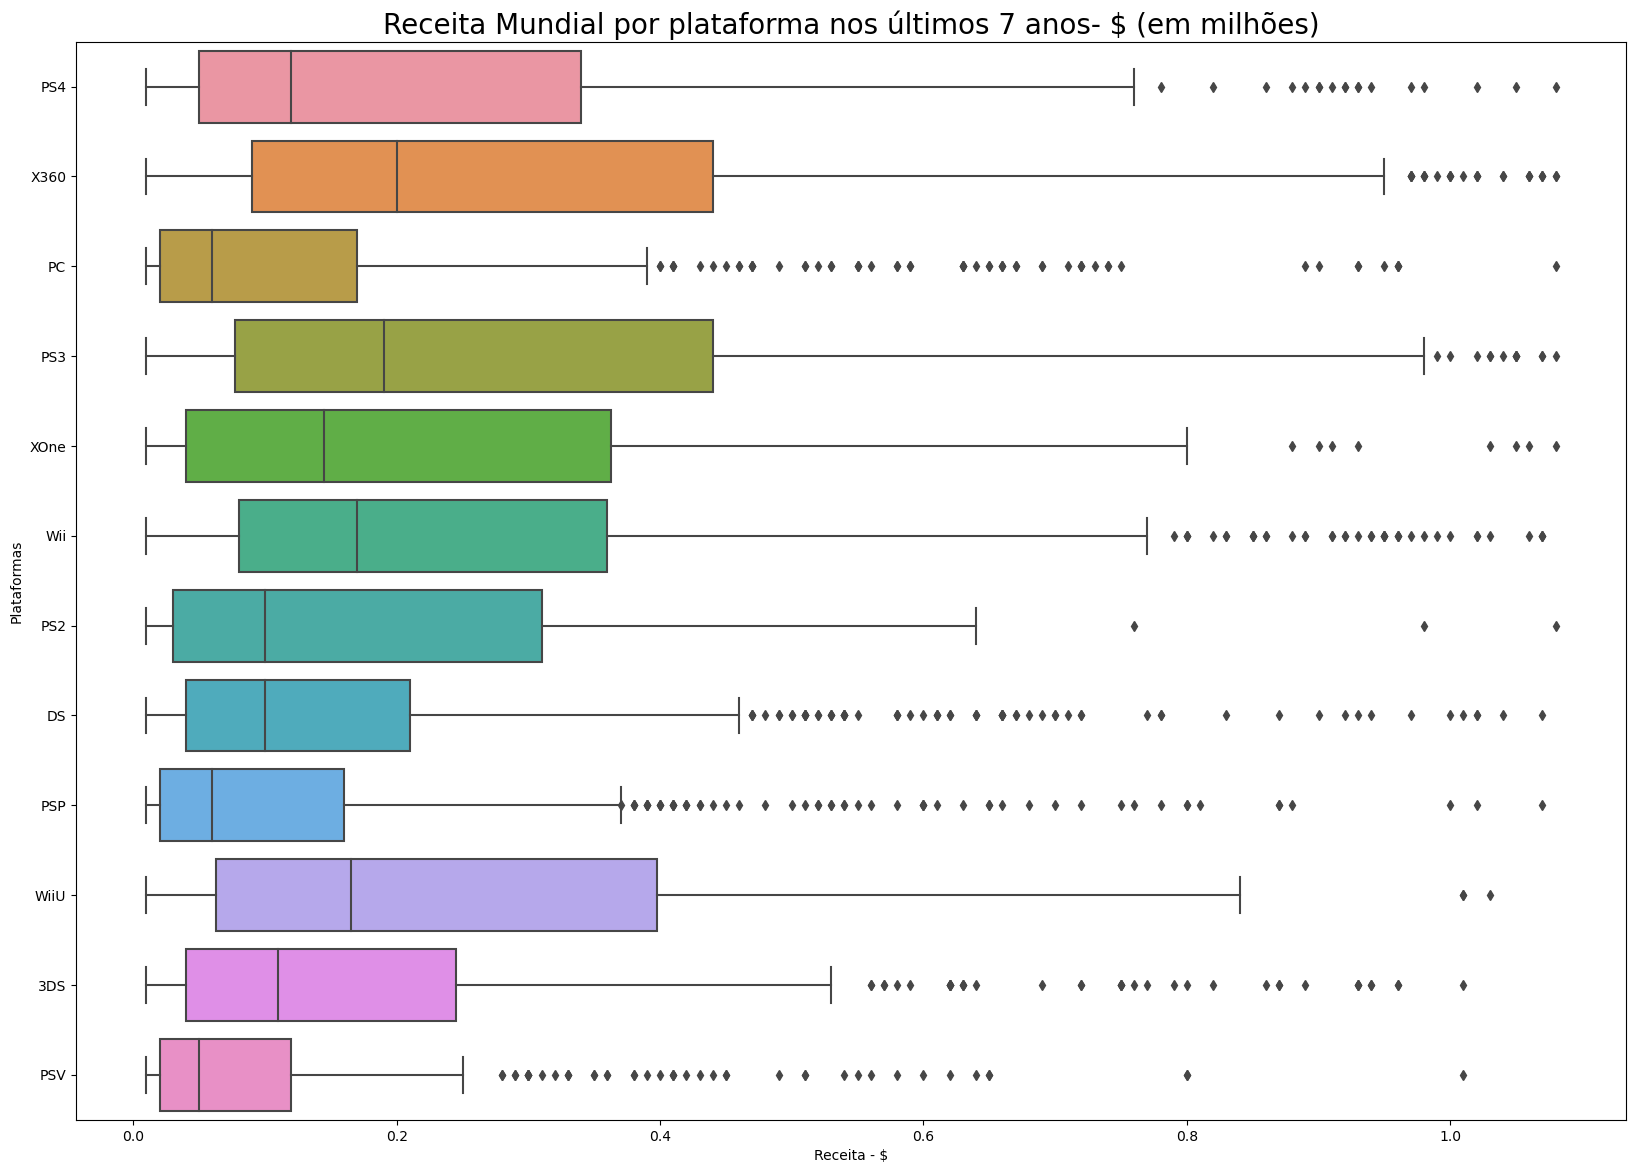

In [56]:
plt.figure(figsize=(20, 14))
plt.title("Receita Mundial por plataforma nos últimos 7 anos- $ (em milhões)" , fontsize=20)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and year_of_release >= 2009'), x='total_sale', y='platform', orient='h')
plt.xlabel("Receita - $")
plt.ylabel('Plataformas')
plt.show()


In [57]:
plats = df.groupby('platform')['total_sale'].sum().sort_values(ascending=False)
plats = plats.reset_index()
plats.head()

,platform,total_sale
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


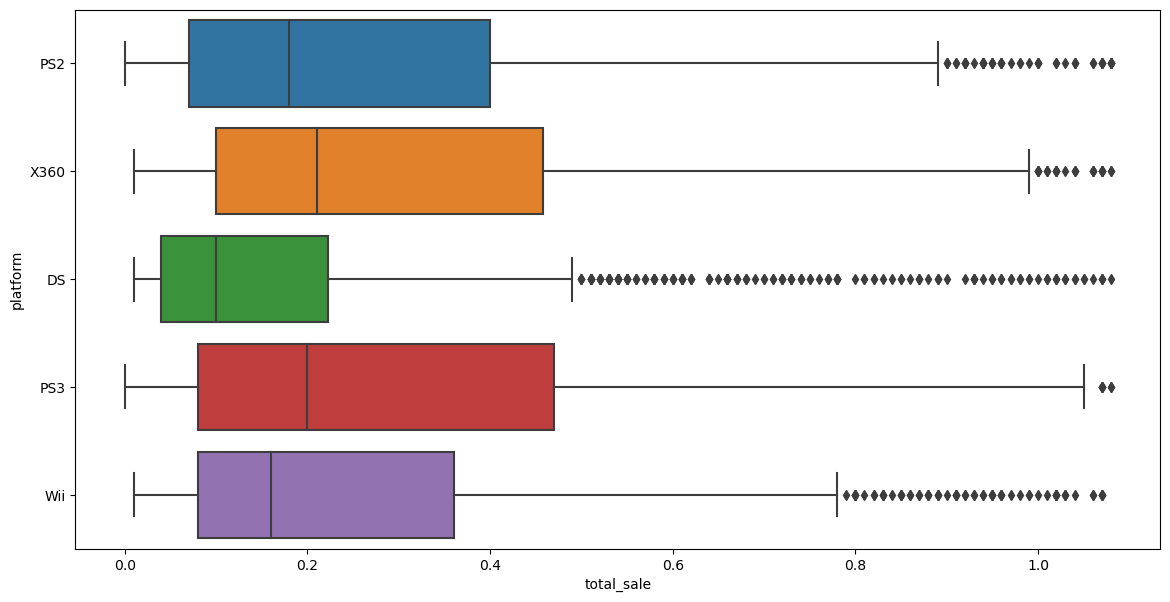

In [58]:
lead_plat = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

plt.figure(figsize=(14, 7))
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and platform == @lead_plat'), x='total_sale', y='platform', orient='h')
plt.show()

### Ao observar as receitas por plataformas, chega-se a conclusão que os valores do PS3 sãos os mais estáveis seguidos pelo Xbox 360, não possuindo tantos valores foram de seus quartis. 

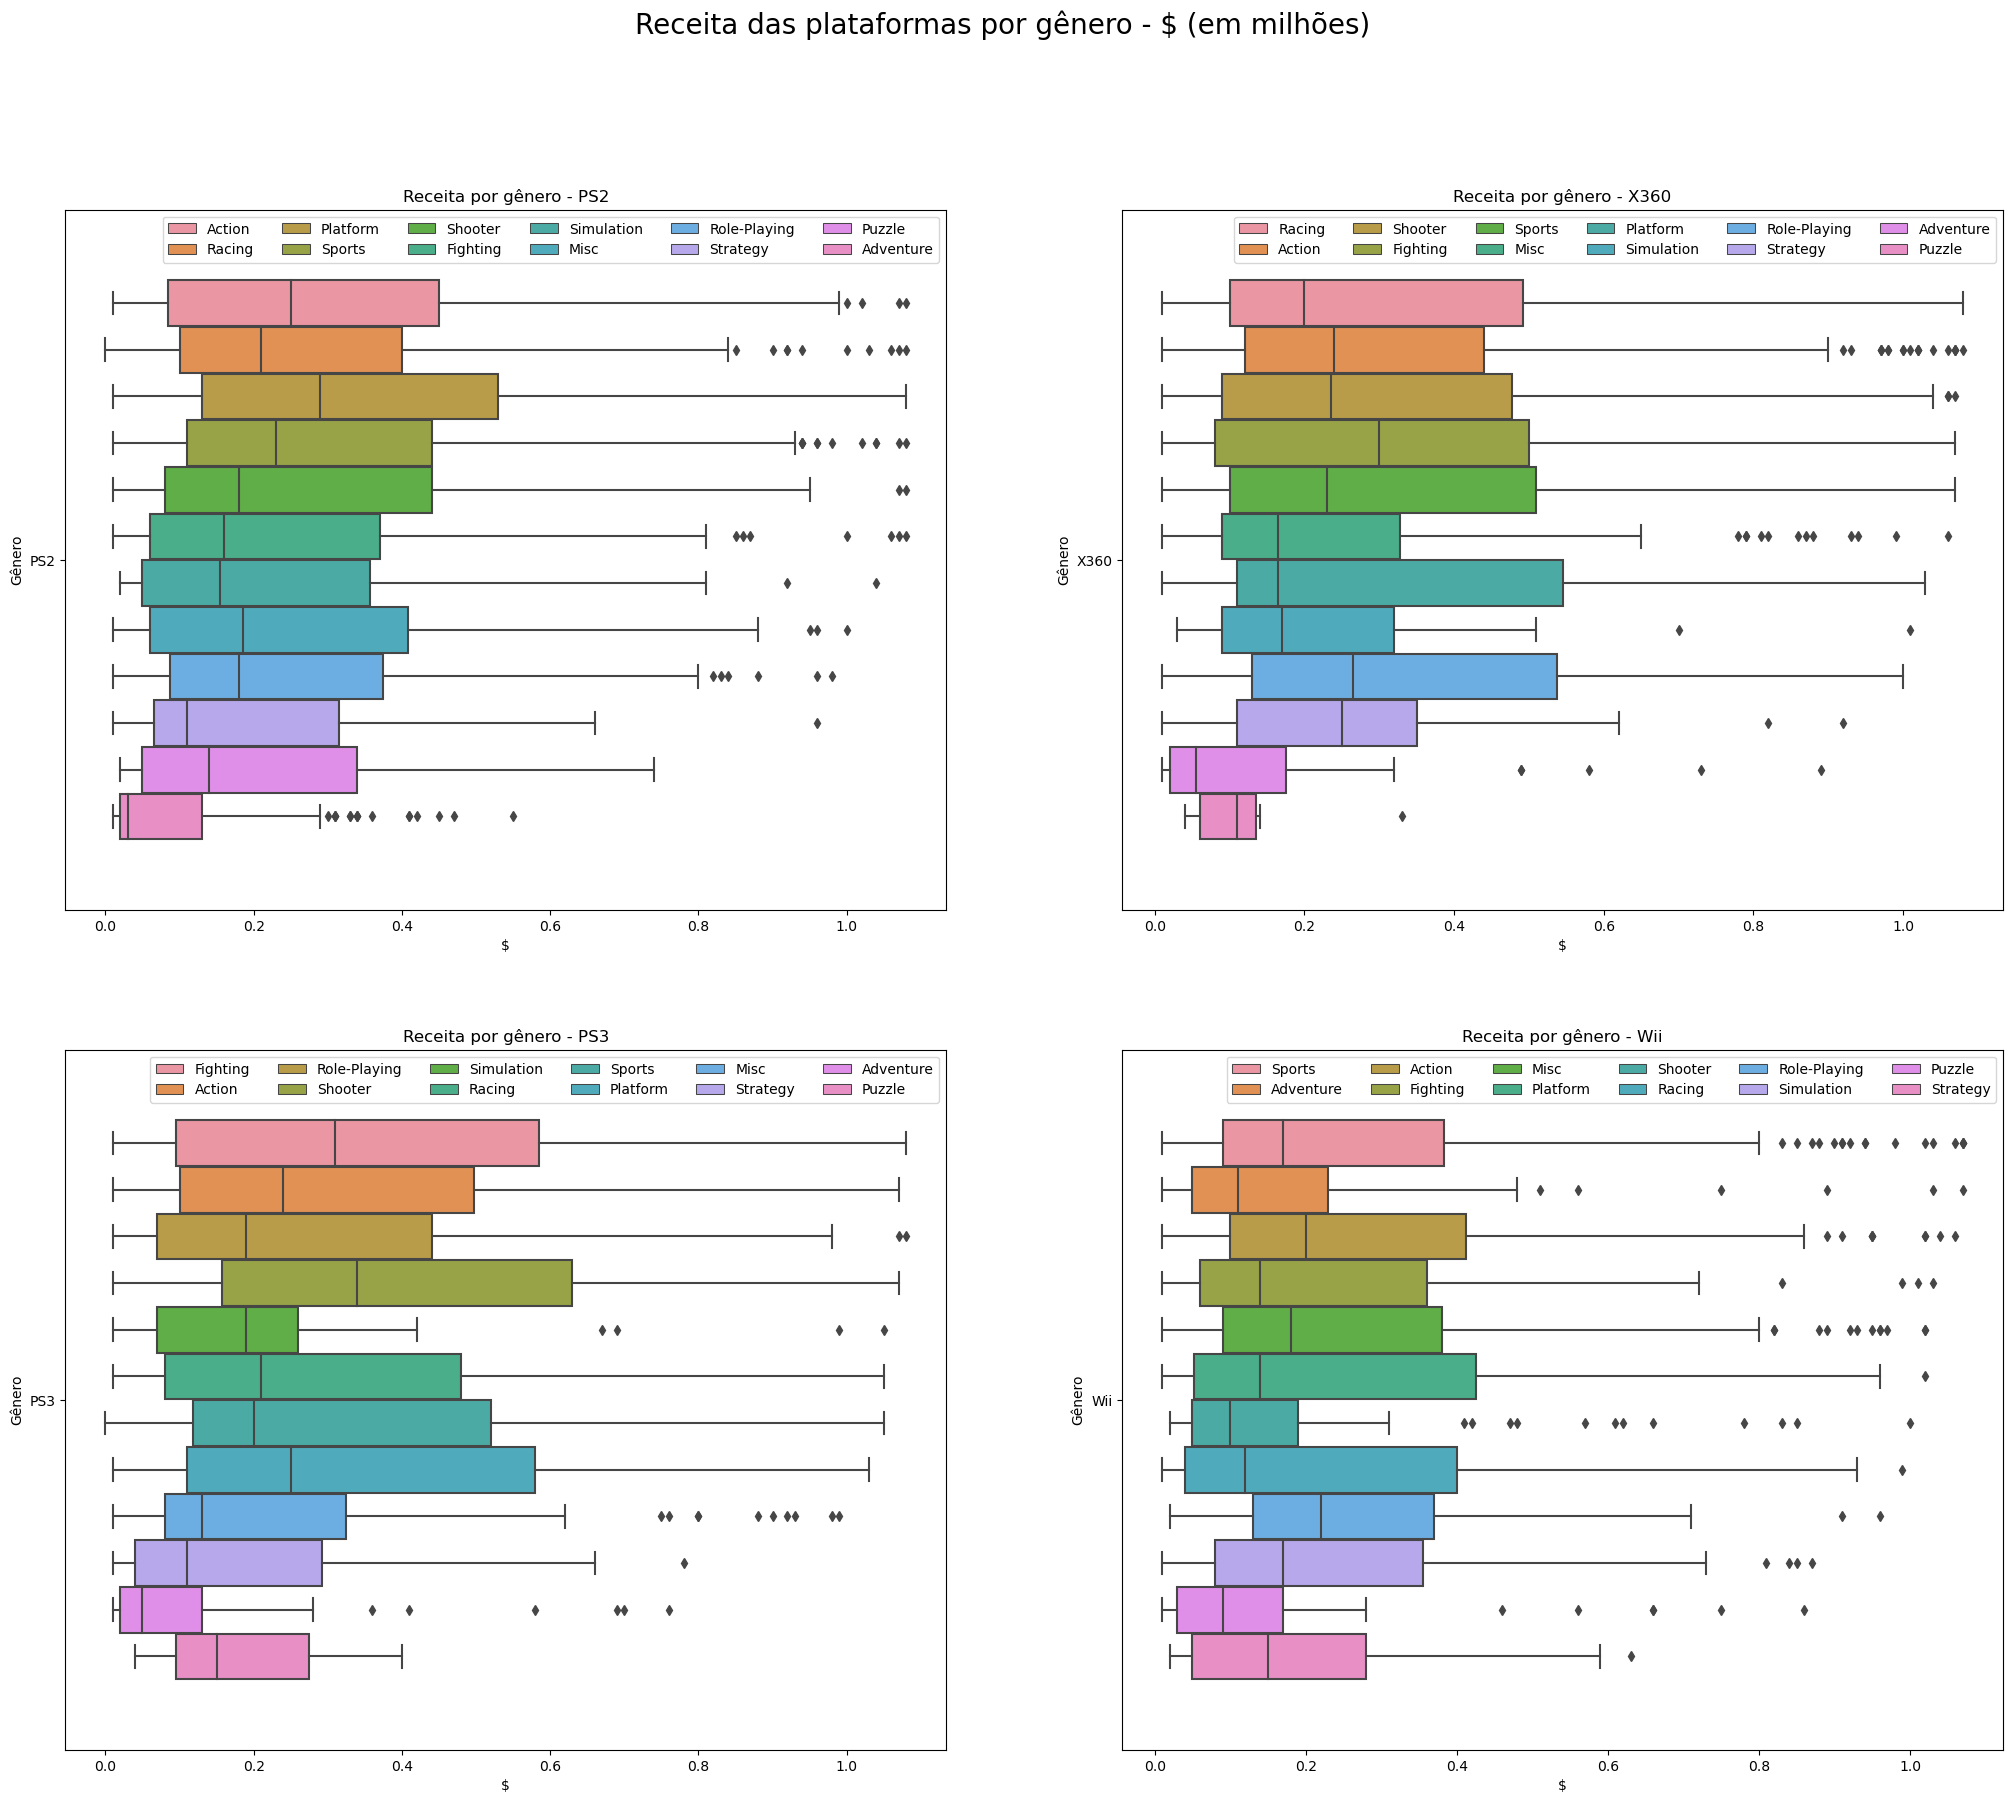

In [59]:
# Receita das plataformas por gênero

plt.figure(figsize=(25, 20))
plt.suptitle("Receita das plataformas por gênero - $ (em milhões)", fontsize=20)

plt.subplot(2, 2, 1)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and platform == "PS2"'), x='total_sale', y='platform', hue='genre', orient='h')
plt.title('Receita por gênero - PS2')
plt.xlabel('$')
plt.ylabel('Gênero')
plt.legend(ncol=6, loc="best")

plt.subplot(2, 2, 2)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and platform == "X360"'), x='total_sale', y='platform', hue='genre', orient='h')
plt.legend(ncol=6, loc="best")
plt.title('Receita por gênero - X360')
plt.xlabel('$')
plt.ylabel('Gênero')

plt.subplot(2, 2, 3)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and platform == "PS3"'), x='total_sale', y='platform', hue='genre', orient='h')
plt.legend(ncol=6, loc="best")
plt.title('Receita por gênero - PS3')
plt.xlabel('$')
plt.ylabel('Gênero')

plt.subplot(2, 2, 4)
sns.boxplot(data=df.query('@IQR_total_min < total_sale < @IQR_total_max and platform == "Wii"'), x='total_sale', y='platform', hue='genre', orient='h')
plt.legend(ncol=6, loc="best")
plt.title('Receita por gênero - Wii')
plt.xlabel('$')
plt.ylabel('Gênero')



plt.show()

In [60]:
linha2 = df_dropped.groupby(['year_of_release', 'platform'])['total_sale'].sum()
linha2 = linha2.reset_index()
linha2

linha3 = df_dropped.groupby(['year_of_release', 'platform'])['total_sale'].mean()
linha3 = linha3.reset_index()
linha3

gen_6 = ['GC','PS2','XB']
gen_7 = ['PS3','Wii','X360']
gen_8 = ['PS4','XOne','WiiU']


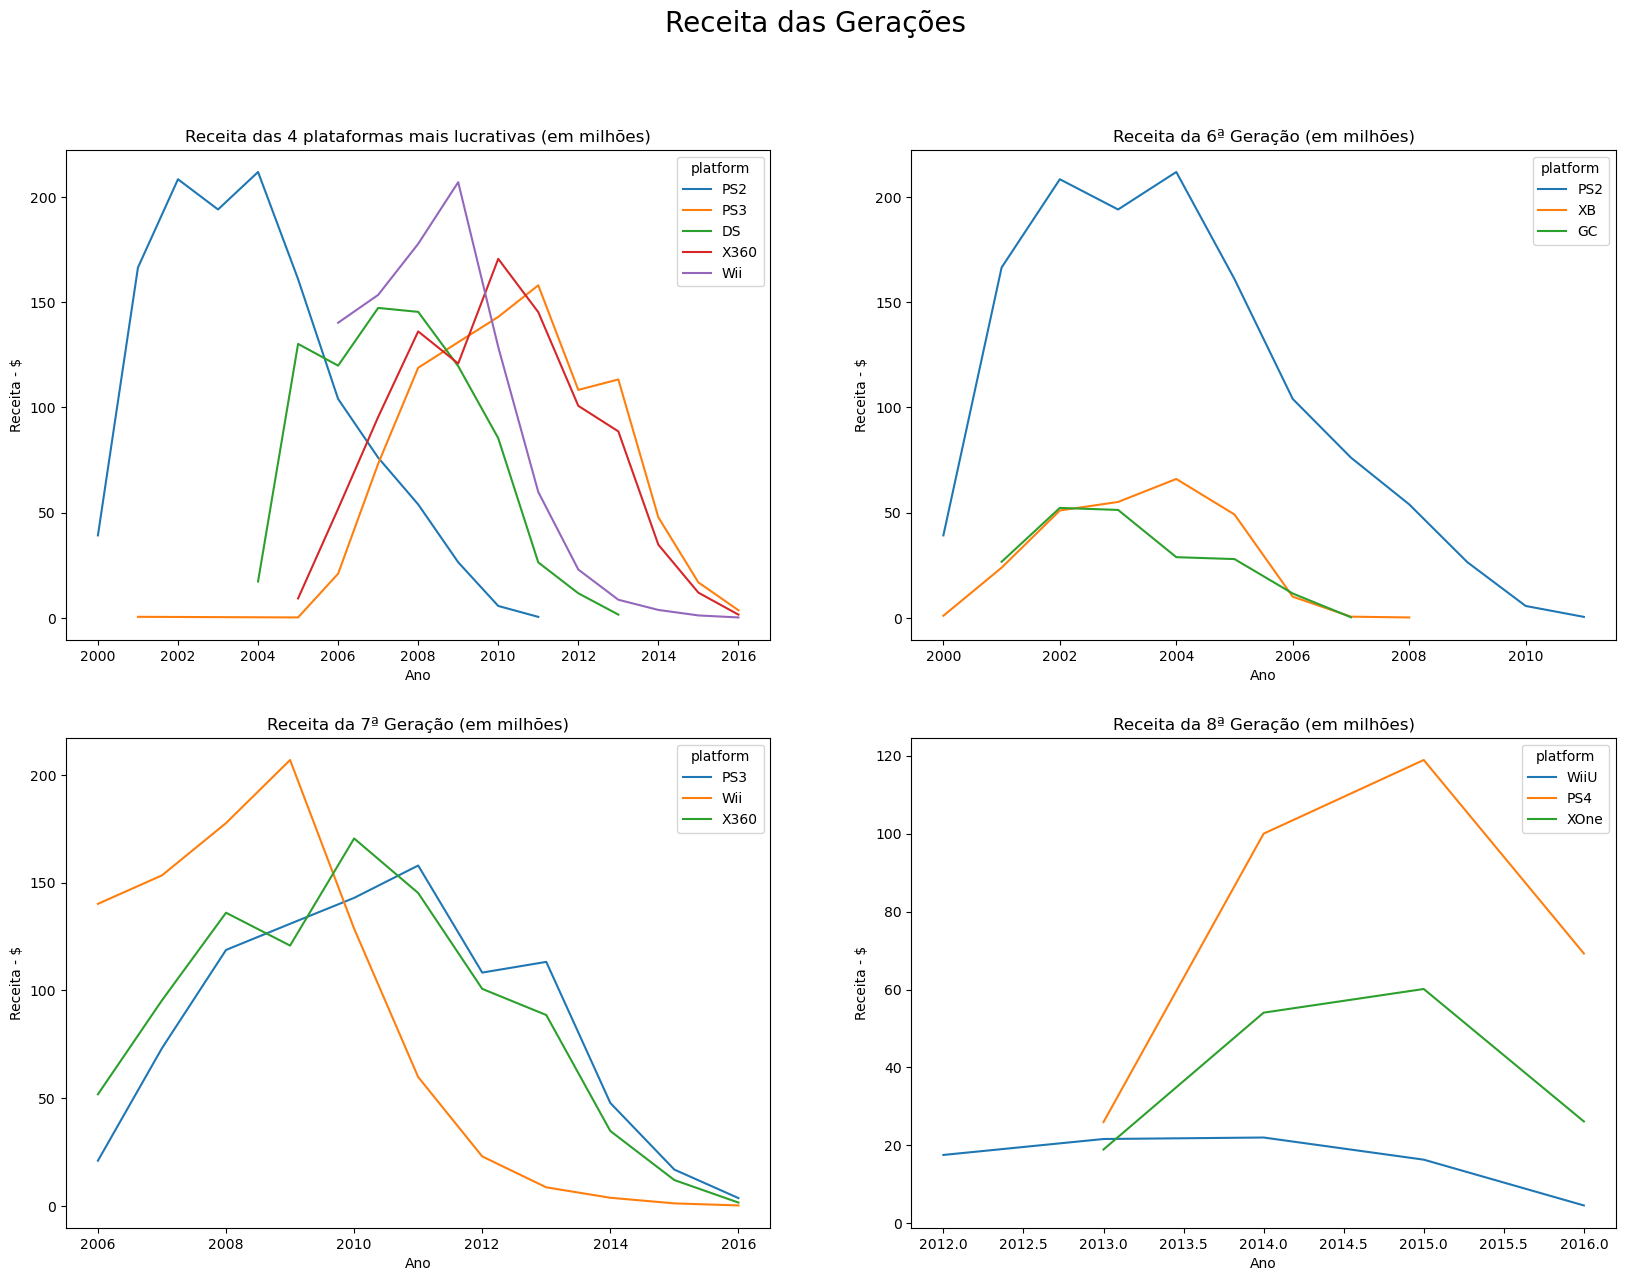

In [61]:
# Gráfico de linha com a Receita dos consoles por Ano.

plt.figure(figsize=(20, 14))
plt.suptitle("Receita das Gerações", fontsize=20)


plt.subplot(2, 2, 1)
sns.lineplot(data=linha2.query('platform == @lead_plat and year_of_release >= 2000'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita das 4 plataformas mais lucrativas (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")


plt.subplot(2, 2, 2)
sns.lineplot(data=linha2.query('platform == @gen_6'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita da 6ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.subplot(2, 2, 3)
sns.lineplot(data=linha2.query('platform == @gen_7 and year_of_release >= 2006'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita da 7ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.subplot(2, 2, 4)
sns.lineplot(data=linha2.query('platform == @gen_8 and year_of_release >= 2010'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita da 8ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.show();

### É nítido que os consoles da Sony estão em vantagem perante as outras plataformas, já que, tomando como exemplo a Nintendo que é uma espécie nicho, a Sony consegue ser mais generalista e agradar mais o maior número de pessoas.

### Por isso o comportamento do gráfico de linhas. A Receita dela mesmo com o declínio normal da popularidade das plataformas ainda é a mais lucrativa da sua geração.

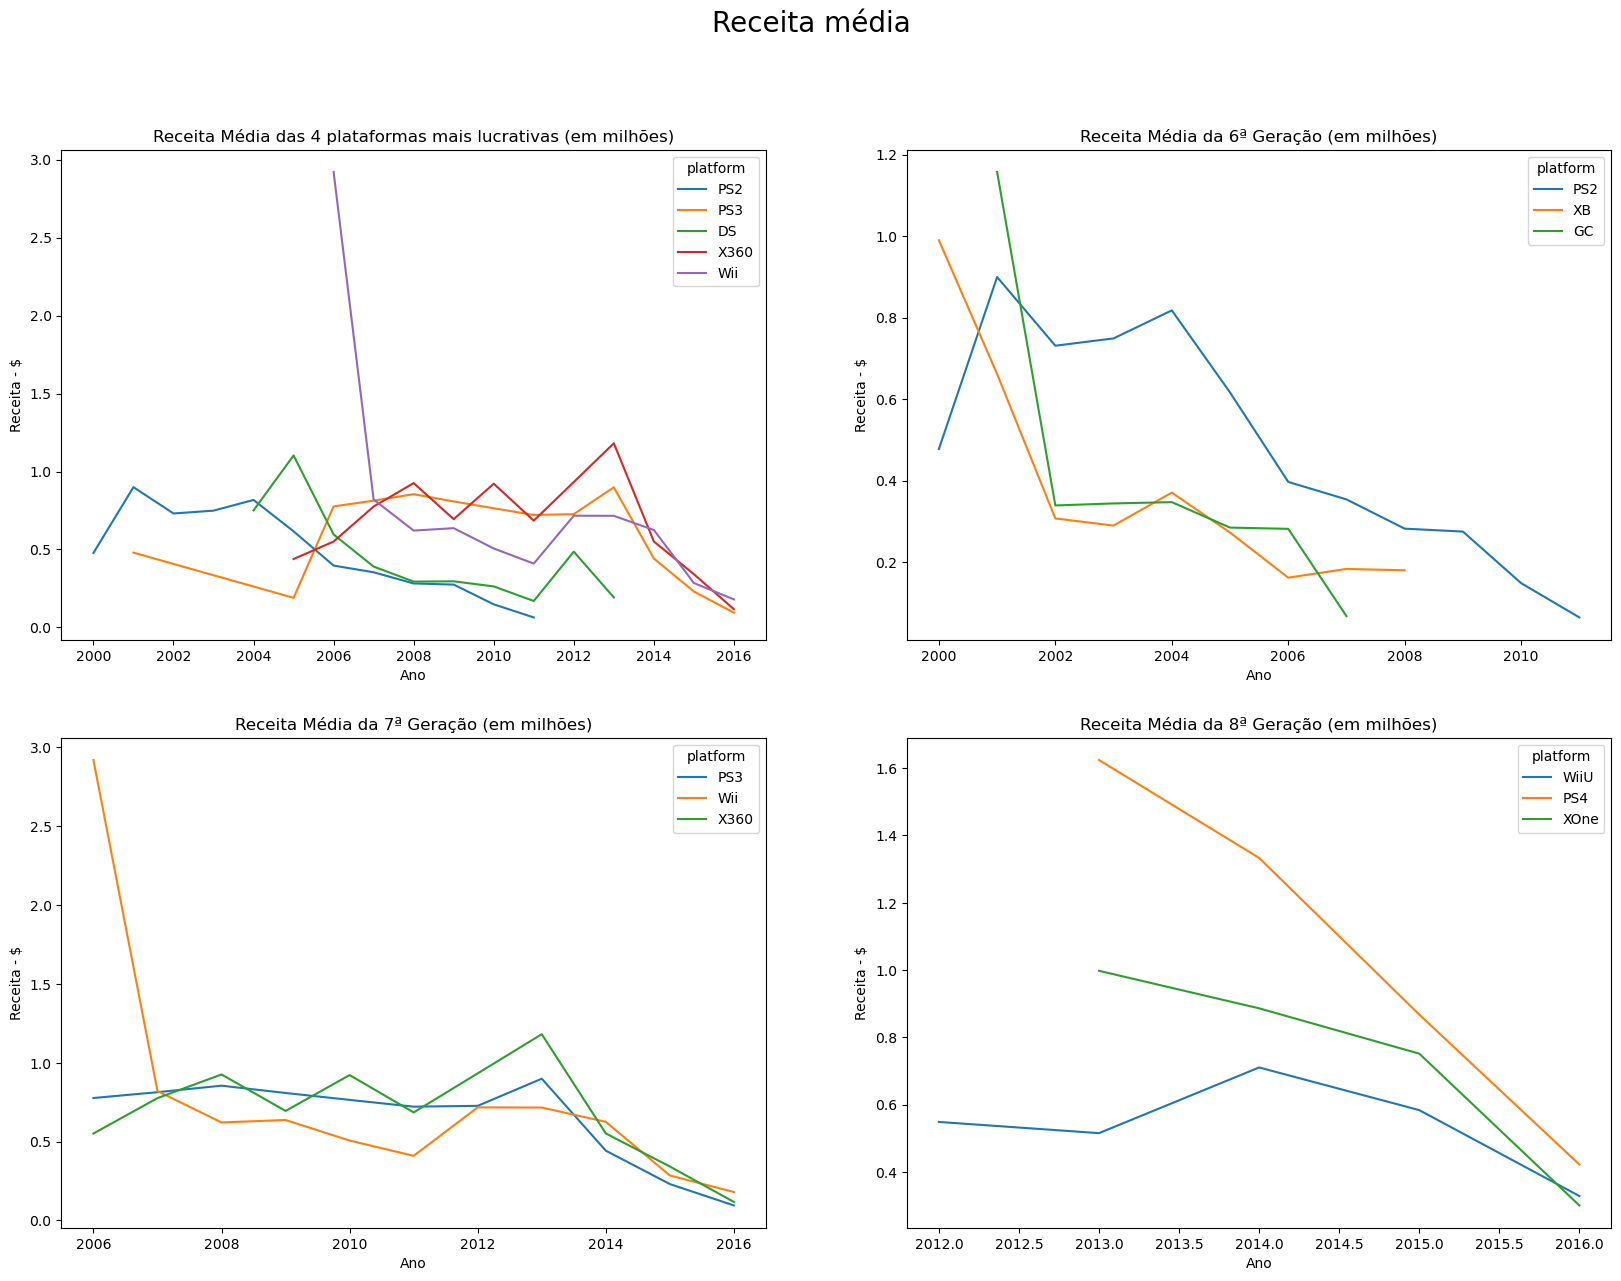

In [62]:
# Gráfico de linha com a Receita dos consoles por Ano.

plt.figure(figsize=(20, 14))
plt.suptitle("Receita média", fontsize=20)


plt.subplot(2, 2, 1)
sns.lineplot(data=linha3.query('platform == @lead_plat and year_of_release >= 2000'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita Média das 4 plataformas mais lucrativas (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")


plt.subplot(2, 2, 2)
sns.lineplot(data=linha3.query('platform == @gen_6 and year_of_release >= 2000'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita Média da 6ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.subplot(2, 2, 3)
sns.lineplot(data=linha3.query('platform == @gen_7 and year_of_release >= 2006'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita Média da 7ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.subplot(2, 2, 4)
sns.lineplot(data=linha3.query('platform == @gen_8 and year_of_release >= 2009'), x='year_of_release', y='total_sale', color='red', hue='platform');
plt.title("Receita Média da 8ª Geração (em milhões)")
plt.ylabel("Receita - $")
plt.xlabel("Ano")

plt.show();

## Observa-se que as plataformas estão em um momento de declínio das receitas médias, já que como pode-se observar os picos das plataformas se dá em seu lançamento, e posteriormente, em ocasiões como lançamento de um jogo muito aguardado, ou inédito com uma propósta única ou com muito renome. 

## Mas mesmo havendo o declínio comum as plataformas da Sony "sobrevivem" por mais tempo. 

In [63]:
notas = df.dropna(subset=['user_score', 'critic_score'])
user_notas_plat = notas.groupby('platform')['user_score']
critic_notas_plat = notas.groupby('platform')['critic_score']

user_notas_genr = notas.groupby('genre')['user_score']
critic_notas_genr = notas.groupby('genre')['critic_score']

plat_region = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()



genr = df.groupby('genre')['total_sale'].sum()
genr.sort_values(ascending=False).reset_index()



na_region = df.groupby('platform')[['na_sales']].sum()
eu_region = df.groupby('platform')[['eu_sales']].sum()
jp_region = df.groupby('platform')[['jp_sales']].sum()

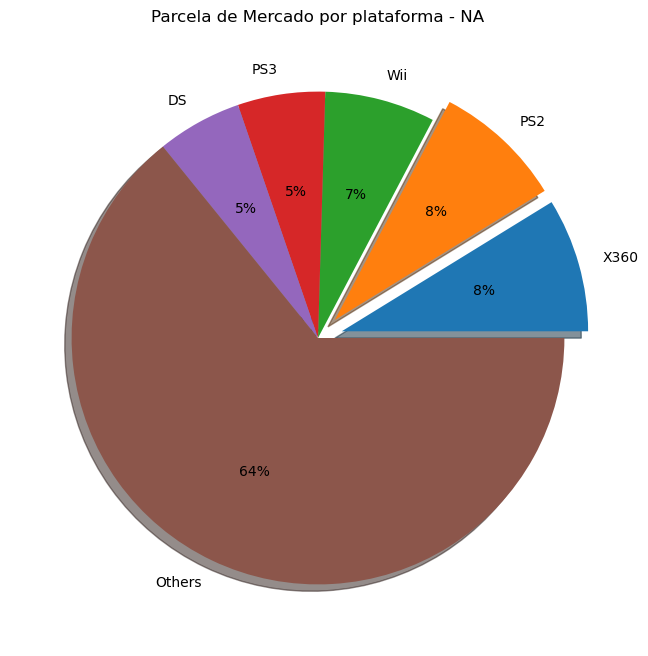

In [64]:
# Mercado NA

na_top5= ['X360', 'PS2', 'Wii', 'PS3', 'DS']
na_region.query('platform == @na_top5').sort_values(by='na_sales', ascending=False)
value = na_region.query('platform != @na_top5').sum()
new_na_reg = {'platform':['X360', 'PS2', 'Wii', 'PS3', 'DS', 'Others'], 'na_sales': [602.47, 583.84, 496.90, 393.49, 382.40, 4402.35] }
new_na = pd.DataFrame(data = new_na_reg, columns=['platform', 'na_sales'])


platform = new_na.platform 
proporcao = new_na.na_sales
explode = (0.1, 0.1, 0, 0, 0, 0)




#plotando o gráfico
plt.figure(figsize=(10,8))
plt.pie(proporcao, labels=platform, explode=explode, autopct="%1d%%", shadow=True)

plt.title('Parcela de Mercado por plataforma - NA')

plt.show()

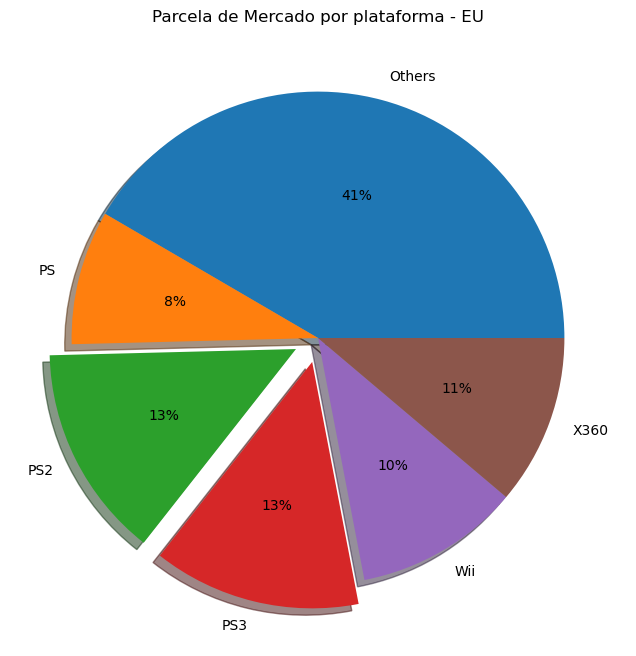

In [65]:
# Mercado EU

eu_top5 = ['PS2', 'PS3', 'X360', 'Wii', 'PS']
eu_dict = eu_region.query('platform== @eu_top5').sort_values(by='eu_sales', ascending=False).to_dict()
eu_dict2 = {'eu_sales': {'PS2': 339.29,
  'PS3': 330.29,
  'X360': 270.76,
  'Wii': 262.21,
  'PS': 213.61,
  'Others': 1008.51}}

eu_dt = pd.DataFrame(eu_dict2)
eu_dt = eu_dt.reset_index()
eu_dt.rename(columns={'index':'platform'},inplace=True)
eu_dt


platform = eu_dt.platform 
proporcao = eu_dt.eu_sales
explode = (0, 0, 0.1, 0.1, 0, 0)




#plotando o gráfico
plt.figure(figsize=(10,8))
plt.pie(proporcao, labels=platform, explode=explode, autopct="%1d%%", shadow=True)

plt.title('Parcela de Mercado por plataforma - EU')

plt.show()

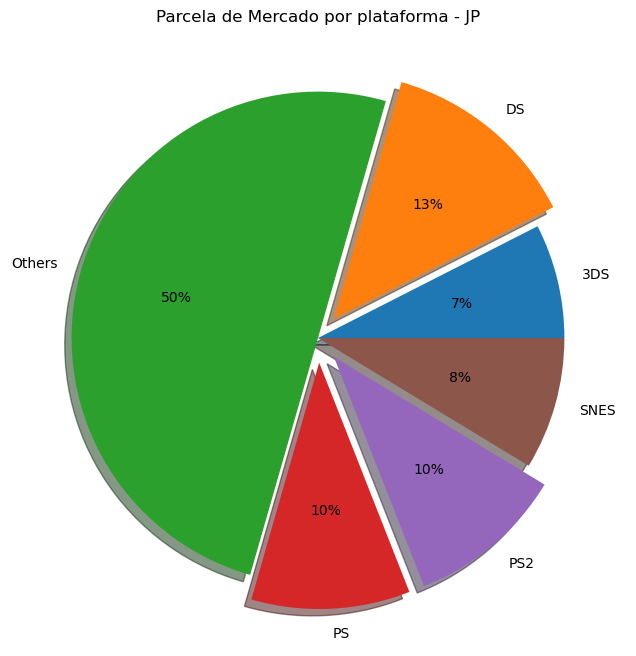

In [66]:
# Mercado JPA

jp_top5 = ['DS', 'PS', 'PS2', 'SNES', '3DS']
jp_region.query('platform== @jp_top5').sum()
jp_dict = jp_region.query('platform== @jp_top5').sort_values(by='jp_sales', ascending=False).to_dict()
jp_top5 = ['DS', 'PS', 'PS2', 'SNES', '3DS']
jp_dict = jp_region.query('platform== @jp_top5').sort_values(by='jp_sales', ascending=False).to_dict()
jp_dict2 ={'jp_sales': {'DS': 175.57,
  'PS': 139.82,
  'PS2': 139.2,
  'SNES': 116.55,
  '3DS': 100.67,
  'Others': 671.81}}

jp_dt = pd.DataFrame(jp_dict2)
jp_dt = jp_dt.reset_index()
jp_dt.rename(columns={'index':'platform'},inplace=True)
jp_dt


platform = jp_dt.platform 
proporcao = jp_dt.jp_sales
explode = (0, 0.1, 0, 0.1, 0.1, 0)




#plotando o gráfico
plt.figure(figsize=(10,8))
plt.pie(proporcao, labels=platform, explode=explode, autopct="%1d%%", shadow=True)

plt.title('Parcela de Mercado por plataforma - JP')

plt.show()

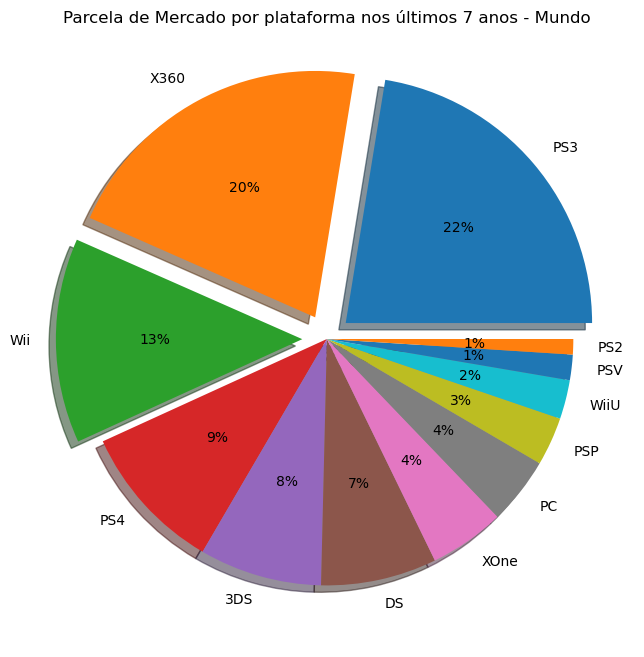

In [67]:
total = df.query('year_of_release >= 2009').groupby('platform')['total_sale'].sum()
total = total.reset_index().sort_values(by= 'total_sale', ascending=False)
platform = total.platform
proporcao = total.total_sale
explode = (0.1, 0.1, 0.1 ,0, 0, 0, 0, 0, 0, 0, 0, 0)



#plotando o gráfico
plt.figure(figsize=(10,8))
plt.pie(proporcao, labels=platform, explode= explode, autopct="%1d%%", shadow=True)

plt.title('Parcela de Mercado por plataforma nos últimos 7 anos - Mundo')

plt.show;



### É perceptível que no decorrer dos ano os jogos das plataformas da Sony, dominaram o mercado mundial. Como mostra os gráficos de Pizza, na América do Norte, Europa e Japão, os "Playstations" sempre estiveram entre os 5 que mais geraram receita.

In [68]:
round(critic_notas_plat.describe().sort_values(by='mean', ascending=False), 2)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DC,14.0,87.36,5.87,80.0,82.25,88.0,89.75,98.0
PC,703.0,75.98,11.16,33.0,70.00,78.0,84.00,96.0
PS,156.0,74.13,16.55,26.0,64.75,78.0,87.00,98.0
XOne,165.0,73.62,12.88,20.0,67.00,76.0,83.00,97.0
PS4,249.0,72.13,12.55,19.0,66.00,74.0,80.00,97.0
XB,581.0,71.52,14.19,19.0,65.00,74.0,82.00,97.0
GC,356.0,71.10,13.70,23.0,63.00,72.0,81.00,97.0
PS3,790.0,70.82,13.97,13.0,62.00,73.0,81.00,98.0
PSV,119.0,70.80,10.91,33.0,64.00,71.0,78.50,93.0


In [69]:
round(user_notas_genr.describe().sort_values(by='mean', ascending=False), 2)


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Role-Playing,721.0,7.62,1.08,1.4,7.10,7.80,8.40,9.6
Platform,407.0,7.37,1.44,1.4,6.60,7.80,8.50,9.4
Fighting,383.0,7.31,1.41,0.9,6.60,7.60,8.30,9.2
Strategy,284.0,7.31,1.59,0.6,6.80,7.75,8.33,9.4
Puzzle,121.0,7.29,1.34,2.2,6.60,7.50,8.20,9.5
Adventure,265.0,7.19,1.62,0.5,6.40,7.70,8.30,9.4
Simulation,306.0,7.19,1.61,2.1,6.70,7.60,8.30,9.6
Sports,973.0,7.11,1.45,0.7,6.30,7.50,8.20,9.5
Racing,598.0,7.10,1.46,1.0,6.30,7.40,8.20,9.5


In [70]:
round(critic_notas_genr.describe().sort_values(by='mean', ascending=False), 2)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Sports,973.0,74.07,13.25,19.0,68.00,77.0,83.00,98.0
Role-Playing,721.0,72.82,12.00,35.0,65.00,74.0,82.00,96.0
Strategy,284.0,72.76,11.63,35.0,66.00,74.0,81.00,94.0
Shooter,886.0,70.90,14.44,22.0,63.00,74.0,81.00,97.0
Puzzle,121.0,70.90,13.47,25.0,67.00,74.0,81.00,90.0
Simulation,306.0,69.98,12.17,31.0,64.25,72.0,78.00,92.0
Platform,407.0,69.97,13.05,19.0,61.00,71.0,79.00,97.0
Fighting,383.0,69.75,14.30,23.0,61.00,73.0,80.00,98.0
Racing,598.0,69.63,14.08,13.0,62.00,71.0,81.00,96.0


In [71]:
type = df.pivot_table(index=['platform', 'genre'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum', 'mean'])

type

sum                        mean                    
                      eu_sales jp_sales na_sales  eu_sales  jp_sales  na_sales
platform genre                                                                
2600     Action           1.64     0.00    27.39  0.026885  0.000000  0.449016
         Adventure        0.10     0.00     1.59  0.050000  0.000000  0.795000
         Fighting         0.07     0.00     1.16  0.035000  0.000000  0.580000
         Misc             0.20     0.00     3.34  0.040000  0.000000  0.668000
         Platform         0.72     0.00    12.38  0.080000  0.000000  1.375556
...                        ...      ...      ...       ...       ...       ...
XOne     Role-Playing     3.43     0.01     6.15  0.245000  0.000714  0.439286
         Shooter         17.80     0.16    36.86  0.468421  0.004211  0.970000
         Simulation       0.31     0.00     0.32  0.077500  0.000000  0.080000
         Sports           8.73     0.02    15.59  0.229737  0.000526  0.410263
         Strategy         0.11     0.00     0.27  0.036667  0.000000  0.090000

[293 rows x 6 columns]

In [72]:
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].count()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1,1,1
E,3993,3993,3993
E10+,1420,1420,1420
EC,8,8,8
M,1563,1563,1563
RP,6769,6769,6769
T,2961,2961,2961


In [73]:
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1295.55,710.52,199.57
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
M,748.48,483.97,64.24
RP,1242.46,613.91,841.96
T,759.75,427.03,151.40


In [74]:
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.260000,0.610000,0.000000
E,0.324455,0.177941,0.049980
E10+,0.248817,0.132761,0.028310
EC,0.191250,0.013750,0.000000
M,0.478874,0.309642,0.041100
RP,0.183551,0.090694,0.124385
T,0.256586,0.144218,0.051131


>> ## 3.1.2 Conclusão Intermediária

Inicialmente, observa-se que as plataformas mais lucrativas foram, em ordem decrescente: 1) PS2, 2) X360, 3) PS3 e 4) Wii.
Os anos que o mundo dos games tiveram a maior receita foi o de 2008, sendo liderado pelo Wii, DS e X360, respectivamente.

O tempo de vida útil médio das plataformas é de 7 anos, tendo seu pico entre seu primeiro e segundo ano, já que ainda tudo é novidade e não há concorrentes no mesmo ano muitas vezes. 
Atualmente a plataforma que ainda apresenta lucro superior as demais da sua geração é o PS4, enquanto o WiiU e o XOne já apresentam uma receita expressivamente baixa se comparado ao PS4, como demonstrado no gráfico de linhas.


Há nítida divergência entre os gostos nas regiões analisadas, como por exemplo os jogos do tipo RPG são mais procurados pelos japoneses, e os jogos de esporte são levemente mais procurados pelos europeus em relação aos norte-americanos. 

Levando em consideração a cultura norte-americana há um alto consumo de jogos de todos os consoles listados, sendo esta região mais lucrativa graficamente.

Bem, Mas como o ocorre com qualquer novidade e o nicho de vídeo games não é diferente a média de consumo tende a cair com o decorrer do tempo, como apresentado nos últimos gráficos que demonstra a evolução das vendas a cada ano.

Observa-se que na América do Norte, os consoles que mais tiveram fatia no mercado foram o PS2 e o Xbox 360, ambos com 8%, o PS2 lidera também na Europa, com 13% assim como o PS3 com 13% também, já no Japão quem lidera é o japonês Nintendo DS, com 13%, enquanto o PS2 e OS ficam ambos com 10% da fatia do mercado japonês. 
No quesito notas, os 5 consoles mais bem avaliados pelos usuários foram, em ordem decrescente: DC, OS, GBA, PS2 e GC. Já para os críticos fora, também em ordem decrescente: DC, PC, OS, Xbox One e PS4.
Os estilos mais bem avaliados pelos usuários foram, em ordem decrescente: RPG, Plataforma, Luta, Estratégia e Puzzle. Já pelos críticos foram: Esportes, RPG, Estratégia, Tiro e Puzzle.


As classificações RP e E são as que geram mais receitas dentre todas as classificações, talvez pelo seu teor abarcar todas as idades, o consumo por parte da sociedade é não é restrito, ou quase não é restrito.



> ## 3.2 Teste de Hipóteses


## Hipótese 1

As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?

* H0: As classificações médias dos usuários das plataformas Xbox One e PC são iguais
* H1: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes

In [75]:
xone = df.dropna(subset=['user_score'])[df['platform'] == "XOne"]['user_score']
pc = df.dropna(subset=['user_score'])[df['platform'] == "PC"]['user_score']
alpha = .05


xone_a = DescrStatsW(xone)
pc_b = DescrStatsW(pc)
test = CompareMeans(xone_a, pc_b)

z, p_value, gl = test.ttest_ind(usevar='unequal')
print('p_value:', p_value)

if p_value <= alpha:
    print('A Hipótese Nula foi rejeitada')
else:
    print('A Hipótese Nula não foi rejeitada')

p_value: 4.935072360183565e-06
A Hipótese Nula foi rejeitada


## Hipótese 2

As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?


* H0: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.
* H1: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.


In [76]:
action = df.query('genre == "Action"').dropna(subset='user_score').user_score
sports = df[df['genre'] == "Sports"].dropna(subset='user_score')['user_score']
alpha = .05


action_a = DescrStatsW(action)
sports_b = DescrStatsW(sports)
test = CompareMeans(action_a, sports_b)

z, p_value, gl = test.ttest_ind(usevar='unequal')
print('p_value:', p_value)

if p_value <= alpha:
    print('A Hipótese Nula foi rejeitada')
else:
    print('A Hipótese Nula não foi rejeitada')

p_value: 0.11483818791499682
A Hipótese Nula não foi rejeitada


# Conclusão Final

Bem, inicialmente não houve grandes mudanças a serem feitas no DataFrame original, apenas adaptações, ou criação de outros DataFrames sem alguns valores que poderiam causar alguma percepção errônea de algum dado. 

Uma vez que essas adaptações foram feitas, partiu-se para as análises que se deu predominantemente com gráficos, para uma melhor percepção dos dados, que foi visto que as plataformas mais lucrativas, mundialmente, foram:

* 1) PS2
* 2) X360
* 3) PS3
* 4) Wii


Houve mudanças significativas nesse pódio quando observado isoladamente cada região, que fica assim:

América do Norte:

* 1) X360
* 2) PS2
* 3) Wii
* 4) PS3
* 5) DS

Europa:

* 1) PS2
* 2) PS3
* 3) X360
* 4) Wii
* 5) PS

Japão:

* 1) DS
* 2) PS
* 3) PS2
* 4) SNES
* 5) 3DS

Podemos ver a preferência dos Japoneses pelos consoles da Nintendo, esses ocupando 3 lugares do seu Top 5.


Durante a análise foi observada também as notas que os usuários e os críticos deram para os jogos e quais consoles e estilos tiveram a maior média de notas: 

Usurários:

 Plataforma:
* 1) DC
* 2) PS
* 3) GBA
* 4) PS2
* 5) GC
 
 Estilo:


* 1) RPG
* 2) Plataforma
* 3) Luta
* 4) Estratégia
* 5) Puzzle


Críticos:

 Plataforma:

* 1) DC
* 2) PC
* 3) PS
* 4) Xbox One
* 5) PS4

 Estilo:


* 1) Esportes
* 2) RPG
* 3) Estratégia
* 4) Tiro
* 5) Puzzle


Não há, dados o suficiente para embasar uma decisão a respeito da interferência das classificações dos jogos e a venda em determinadas regiões, em boa parte delas jogos com classificação pendente ("RP") estão na frente das vendas. Logo, fica obscura a análise de fator. Como demonstrado no gráfico de correlação e na matrix de correlação. 

E por último foram testadas 2 hipóteses a respeito das classificações médias dos usuários. As hipóteses foram: 

* 1) As classificações médias dos usuários das plataformas Xbox One e PC são iguais.
* 2) As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.


A primeira hipótese foi rejeitada, enquanto a segunda não foi rejeitada, o que significa que as médias dos usuários dos jogos to gênero Action e Sports não possuem a média com diferenças estatisticamente significativas. 

Posto isso, concluí-se que os jogos da plataforma Playstation(Sony), são mais populares frente aos concorrentes. Os jogos do tipo Ação, Esportes e Tiro, geraram mais receitas no decorrer dos anos. Portanto, é interessante dar mais atenção a esses estilos, não esquecendo também de outros estilos como RPG, por exemplo, a depender da região.

As plataformas da Sony apresentam um comportamento mais estável que as outras plataformas, como por exemplo, nos números abordados pelos gráficos de linha onde os consoles das Sony, sempre mantiveram-se na vantagem economica, onde ou terminavam seu cíclo com maior receita, ou terminava seu cíclo anos após as outras plataformas, seja em lanãmentos como o caso do PS2 ou em receita. 



